In [1]:
#!/usr/bin/python3 -m pip install scikit-fuzzy

In [2]:
%load_ext autoreload

import os, sys
sys.path.insert(0, "../FlowSets/")

%autoreload 2
from flowset import *

import pandas as pd

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

import matplotlib.pyplot as plt

import polars as pl
import numpy as np

In [3]:
def download_and_unzip(download_url_link, dir_path, zipped_filename,destination_dir_name):
    #https://www.tutorialsbuddy.com/download-and-unzip-a-zipped-file-in-python
    print("Download starting")
    import urllib
    import zipfile
    import gzip
    urllib.request.urlretrieve(
        download_url_link, os.path.join(dir_path, zipped_filename)
    )
    print("Download complete")

    print("unzipping file starting")
    
    if zipped_filename.endswith(".zip"):
        with zipfile.ZipFile(os.path.join(dir_path, zipped_filename), "r") as zip_file:
            zip_file.extractall(os.path.join(dir_path, destination_dir_name))
    elif zipped_filename.endswith(".gz"):
        with gzip.GzipFile(os.path.join(dir_path, zipped_filename), "rb") as zip_file:
            with open(os.path.join(dir_path, destination_dir_name, zipped_filename.replace(".gz", "")), "wb") as fout:
                fout.write(zip_file.read())
            
            
    print("unzipping complete")


if not os.path.exists("ReactomePathways.gmt"):
    download_and_unzip("https://reactome.org/download/current/ReactomePathways.gmt.zip", ".", "ReactomePathways.gmt.zip", ".")

In [4]:
if not os.path.exists("goa_human.gaf"):
    download_and_unzip("http://geneontology.org/gene-associations/goa_human.gaf.gz", ".", "goa_human.gaf.gz", ".")

In [5]:
if not os.path.exists("kegg.gmt"):
    download_and_unzip("https://raw.githubusercontent.com/WGLab/GenGen/master/lib/kegg.gmt", ".", "kegg.gmt", ".")

In [6]:
exprData = pl.read_csv("./expression/neutro_expression_by_condition.tsv", has_header=True, sep="\t", null_values=["NA"])
print(exprData)

shape: (53162, 13)
┌───────┬────────────┬───────────┬────────────┬─────┬────────────┬───────┬────────────┬────────────┐
│ clust ┆ count_expr ┆ min.clust ┆ lower_hing ┆ ... ┆ count_all. ┆ gene  ┆ not_expr.c ┆ expr.clust │
│ er    ┆ .cluster   ┆ er        ┆ e.cluster  ┆     ┆ cluster    ┆ ---   ┆ luster     ┆ er         │
│ ---   ┆ ---        ┆ ---       ┆ ---        ┆     ┆ ---        ┆ str   ┆ ---        ┆ ---        │
│ str   ┆ i64        ┆ f64       ┆ f64        ┆     ┆ i64        ┆       ┆ f64        ┆ f64        │
╞═══════╪════════════╪═══════════╪════════════╪═════╪════════════╪═══════╪════════════╪════════════╡
│ clust ┆ 536        ┆ 0.903407  ┆ 2.044749   ┆ ... ┆ 4168       ┆ PTAFR ┆ 0.871401   ┆ 0.128599   │
│ er.co ┆            ┆           ┆            ┆     ┆            ┆       ┆            ┆            │
│ ntrol ┆            ┆           ┆            ┆     ┆            ┆       ┆            ┆            │
├╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌

In [7]:
exprData.filter(pl.col("gene") == "CXCR6")

shape: (1, 13)
┌───────┬────────────┬───────────┬────────────┬─────┬────────────┬───────┬────────────┬────────────┐
│ clust ┆ count_expr ┆ min.clust ┆ lower_hing ┆ ... ┆ count_all. ┆ gene  ┆ not_expr.c ┆ expr.clust │
│ er    ┆ .cluster   ┆ er        ┆ e.cluster  ┆     ┆ cluster    ┆ ---   ┆ luster     ┆ er         │
│ ---   ┆ ---        ┆ ---       ┆ ---        ┆     ┆ ---        ┆ str   ┆ ---        ┆ ---        │
│ str   ┆ i64        ┆ f64       ┆ f64        ┆     ┆ i64        ┆       ┆ f64        ┆ f64        │
╞═══════╪════════════╪═══════════╪════════════╪═════╪════════════╪═══════╪════════════╪════════════╡
│ clust ┆ 1          ┆ 4.214594  ┆ 4.214594   ┆ ... ┆ 4250       ┆ CXCR6 ┆ 0.999765   ┆ 0.000235   │
│ er.se ┆            ┆           ┆            ┆     ┆            ┆       ┆            ┆            │
│ psis  ┆            ┆           ┆            ┆     ┆            ┆       ┆            ┆            │
└───────┴────────────┴───────────┴────────────┴─────┴────────────┴───────┴────────────┴────────────┘

In [8]:
def pl_hist(df, column, n_bins=100,):
    data = df.select(pl.col(column))
    
    fig, ax = plt.subplots(1, 1, tight_layout=True)
    ax.hist(data, bins=n_bins, density=True)
    
    plt.show()
    plt.close()

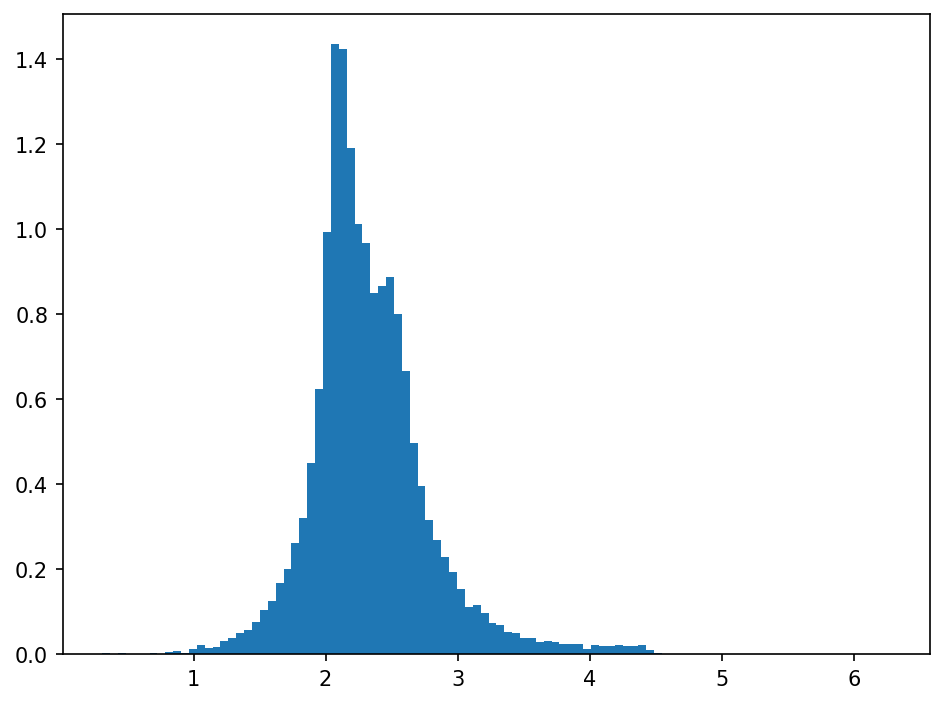

In [9]:
pl_hist(exprData, "mean.cluster")

In [10]:
exprData.head()

shape: (5, 13)
┌───────┬────────────┬───────────┬────────────┬─────┬────────────┬───────┬────────────┬────────────┐
│ clust ┆ count_expr ┆ min.clust ┆ lower_hing ┆ ... ┆ count_all. ┆ gene  ┆ not_expr.c ┆ expr.clust │
│ er    ┆ .cluster   ┆ er        ┆ e.cluster  ┆     ┆ cluster    ┆ ---   ┆ luster     ┆ er         │
│ ---   ┆ ---        ┆ ---       ┆ ---        ┆     ┆ ---        ┆ str   ┆ ---        ┆ ---        │
│ str   ┆ i64        ┆ f64       ┆ f64        ┆     ┆ i64        ┆       ┆ f64        ┆ f64        │
╞═══════╪════════════╪═══════════╪════════════╪═════╪════════════╪═══════╪════════════╪════════════╡
│ clust ┆ 536        ┆ 0.903407  ┆ 2.044749   ┆ ... ┆ 4168       ┆ PTAFR ┆ 0.871401   ┆ 0.128599   │
│ er.co ┆            ┆           ┆            ┆     ┆            ┆       ┆            ┆            │
│ ntrol ┆            ┆           ┆            ┆     ┆            ┆       ┆            ┆            │
├╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ clust ┆ 72         ┆ 1.006317  ┆ 2.040684   ┆ ... ┆ 4168       ┆ HDAC1 ┆ 0.982726   ┆ 0.017274   │
│ er.co ┆            ┆           ┆            ┆     ┆            ┆       ┆            ┆            │
│ ntrol ┆            ┆           ┆            ┆     ┆            ┆       ┆            ┆            │
├╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ clust ┆ 3494       ┆ 1.534644  ┆ 3.555737   ┆ ... ┆ 4168       ┆ CSF3R ┆ 0.161708   ┆ 0.838292   │
│ er.co ┆            ┆           ┆            ┆     ┆            ┆       ┆            ┆            │
│ ntrol ┆            ┆           ┆            ┆     ┆            ┆       ┆            ┆            │
├╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ clust ┆ 1071       ┆ 1.201319  ┆ 2.408878   ┆ ... ┆ 4168       ┆ RPS8  ┆ 0.743042   ┆ 0.256958   │
│ er.co ┆            ┆           ┆            ┆     ┆            ┆       ┆            ┆            │
│ ntrol ┆            ┆           ┆            ┆     ┆            ┆       ┆            ┆            │
├╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ clust ┆ 151        ┆ 1.223719  ┆ 2.422388   ┆ ... ┆ 4168       ┆ AC103 ┆ 0.963772   ┆ 0.036228   │
│ er.co ┆            ┆           ┆            ┆     ┆            ┆ 591.3 ┆            ┆            │
│ ntrol ┆            ┆           ┆            ┆     ┆            ┆       ┆            ┆            │
└───────┴────────────┴───────────┴────────────┴─────┴────────────┴───────┴────────────┴────────────┘

{'seriesOrder': ['cluster.control', 'cluster.sepsis', 'cluster.thrombus']}
-1.0 10.0
centers [1, 2, 3, 4, 5, 6]
Creating Universe Range -1.0 -> 10.0 with step size 0.1
Mean Expr mean.cluster col 7
Expr Count expr.cluster col 12
SD sd.cluster col 8
Cluster cluster col 0
Combining over state:  False


/usr/local/hdd2/data/plaque_ims/sepsis_data/../FlowSets/flowset.py:472: RuntimeWarning: invalid value encountered in true_divide
  values = fuzz.trimf(self.universe, abc)/unscaledValues


cluster.sepsis
cluster.control
cluster.thrombus
shape: (5, 4)
┌──────────┬─────────────────────────────┬────────────────────────────┬────────────────────────────┐
│ gene     ┆ cluster.sepsis              ┆ cluster.control            ┆ cluster.thrombus           │
│ ---      ┆ ---                         ┆ ---                        ┆ ---                        │
│ str      ┆ list[f64]                   ┆ list[f64]                  ┆ list[f64]                  │
╞══════════╪═════════════════════════════╪════════════════════════════╪════════════════════════════╡
│ TNFRSF14 ┆ [0.941599, 0.034852, ...    ┆ [0.935313, 0.023235, ...   ┆ [0.889245, 0.071132, ...   │
│          ┆ 0.0]                        ┆ 0.0]                       ┆ 0.0]                       │
├╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ SYTL1    ┆ [0.976282, 0.009539, ...    ┆ [0.980417, 0.006667, ...   ┆ [0.974752, 0.018695, ...   │
│          ┆ 0.00002...      

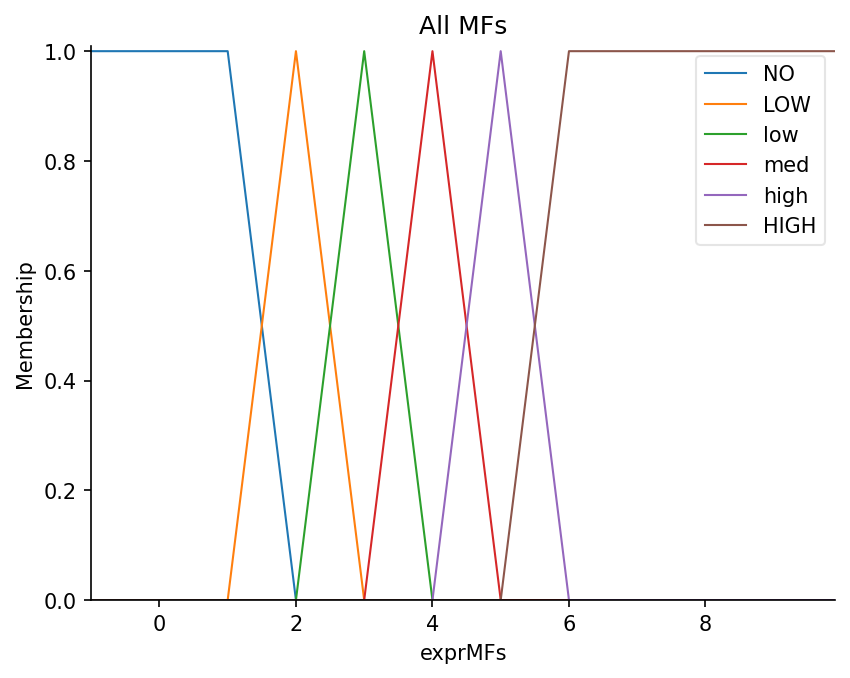

In [11]:
explDFRaw, mfFuzzy = FlowAnalysis.fuzzify_exprvalues(exprData, stepsize=0.1, seriesOrder=["cluster.control", "cluster.sepsis", "cluster.thrombus"], mfLevels = ["NO", "LOW", "low", "med", "high", "HIGH"], centers=[1,2,3,4,5,6]) #
explDFWide = FlowAnalysis.to_vwide(explDFRaw, mfFuzzy)

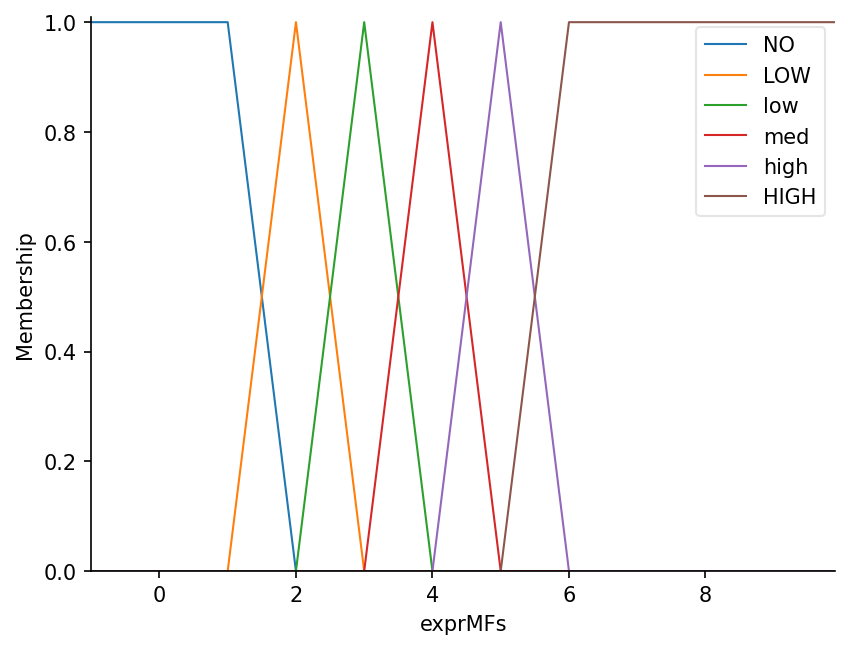

In [12]:
for x in mfFuzzy:
    mfFuzzy[x].view()
    break

In [13]:
explDFWide.filter(pl.col("gene") == "CXCR6")

shape: (1, 19)
┌───────┬────────────┬────────────┬────────────┬─────┬────────────┬────────────┬────────────┬────────────┐
│ gene  ┆ NO.cluster ┆ LOW.cluste ┆ low.cluste ┆ ... ┆ low.cluste ┆ med.cluste ┆ high.clust ┆ HIGH.clust │
│ ---   ┆ .sepsis    ┆ r.sepsis   ┆ r.sepsis   ┆     ┆ r.thrombus ┆ r.thrombus ┆ er.thrombu ┆ er.thrombu │
│ str   ┆ ---        ┆ ---        ┆ ---        ┆     ┆ ---        ┆ ---        ┆ s          ┆ s          │
│       ┆ f64        ┆ f64        ┆ f64        ┆     ┆ f64        ┆ f64        ┆ ---        ┆ ---        │
│       ┆            ┆            ┆            ┆     ┆            ┆            ┆ f64        ┆ f64        │
╞═══════╪════════════╪════════════╪════════════╪═════╪════════════╪════════════╪════════════╪════════════╡
│ CXCR6 ┆ 0.999765   ┆ 0.0        ┆ 0.0        ┆ ... ┆ 0.0        ┆ 0.0        ┆ 0.0        ┆ 0.0        │
└───────┴────────────┴────────────┴────────────┴─────┴────────────┴────────────┴────────────┴────────────┘

In [14]:
isgListLong = ("MX1","MX2","MT2A","RSAD2","SIGLEC1","IFIT1","IFI44","IFI27","IFITM10","IFIT3","IFI6","IFIT1P1","IFIT2","IFITM9P","IFI30","IFITM3","IFI44L","IFIT1B","IFITM5","IFITM3P2","IFITM3P9","IFI27L2","IFIT5","IFITM1","IFIH1","IFI16","IFI35","IFI27L1","IRF6","IRF7","IRF9","IRF5","IRF4","IRF2BP2","IRF2BPL","IRF3","IRF1-AS1","ISG15","ISG20L2","ISG20","XAF1","LY6E","IFITM2","IFITM3P6","IFITM3P3","IFIT6P","IRF2BP1","IRF5P1","IRF2","IRF1","IRF8","IFITM3P7","IFITM4P","IFITM3P1","IFITM3P8")
isgListShort = ("MT2A", "ISG15", "LY6E", "IFIT1", "IFIT2", "IFIT3", "IFITM1", "IFITM3", "IFI44L", "IFI6", "MX1", "IFI27",  "IFI44L", "RSAD2", "SIGLEC1", "IFIT1", "ISG15")

In [15]:
fa = FlowAnalysis(explDFWide, "gene", (  ("control", "Control"), ("sepsis", "Sepsis"), ("thrombus", "Thrombus")), mfFuzzy)
print(fa.flowid2flow)



Creating FlowIDs
{0: [('control', 'NO'), ('sepsis', 'NO'), ('thrombus', 'NO')], 1: [('control', 'NO'), ('sepsis', 'NO'), ('thrombus', 'LOW')], 2: [('control', 'NO'), ('sepsis', 'NO'), ('thrombus', 'low')], 3: [('control', 'NO'), ('sepsis', 'NO'), ('thrombus', 'med')], 4: [('control', 'NO'), ('sepsis', 'NO'), ('thrombus', 'high')], 5: [('control', 'NO'), ('sepsis', 'NO'), ('thrombus', 'HIGH')], 6: [('control', 'NO'), ('sepsis', 'LOW'), ('thrombus', 'NO')], 7: [('control', 'NO'), ('sepsis', 'LOW'), ('thrombus', 'LOW')], 8: [('control', 'NO'), ('sepsis', 'LOW'), ('thrombus', 'low')], 9: [('control', 'NO'), ('sepsis', 'LOW'), ('thrombus', 'med')], 10: [('control', 'NO'), ('sepsis', 'LOW'), ('thrombus', 'high')], 11: [('control', 'NO'), ('sepsis', 'LOW'), ('thrombus', 'HIGH')], 12: [('control', 'NO'), ('sepsis', 'low'), ('thrombus', 'NO')], 13: [('control', 'NO'), ('sepsis', 'low'), ('thrombus', 'LOW')], 14: [('control', 'NO'), ('sepsis', 'low'), ('thrombus', 'low')], 15: [('control', 'NO')

(0, [('control', 'NO'), ('sepsis', 'NO'), ('thrombus', 'NO'), 20603.795428064044])
(1, [('control', 'NO'), ('sepsis', 'NO'), ('thrombus', 'LOW'), 243.2669459240964])
(2, [('control', 'NO'), ('sepsis', 'NO'), ('thrombus', 'low'), 138.55304579038435])
(3, [('control', 'NO'), ('sepsis', 'NO'), ('thrombus', 'med'), 13.330311405785322])
(4, [('control', 'NO'), ('sepsis', 'NO'), ('thrombus', 'high'), 0.5866033589331762])
(5, [('control', 'NO'), ('sepsis', 'NO'), ('thrombus', 'HIGH'), 0.03652383358088092])
(6, [('control', 'NO'), ('sepsis', 'LOW'), ('thrombus', 'NO'), 123.25004975730522])
(7, [('control', 'NO'), ('sepsis', 'LOW'), ('thrombus', 'LOW'), 13.717355224674677])
(8, [('control', 'NO'), ('sepsis', 'LOW'), ('thrombus', 'low'), 11.001405636110352])
(9, [('control', 'NO'), ('sepsis', 'LOW'), ('thrombus', 'med'), 1.7485327439716176])
(10, [('control', 'NO'), ('sepsis', 'LOW'), ('thrombus', 'high'), 0.09946652073848958])
(11, [('control', 'NO'), ('sepsis', 'LOW'), ('thrombus', 'HIGH'), 0.

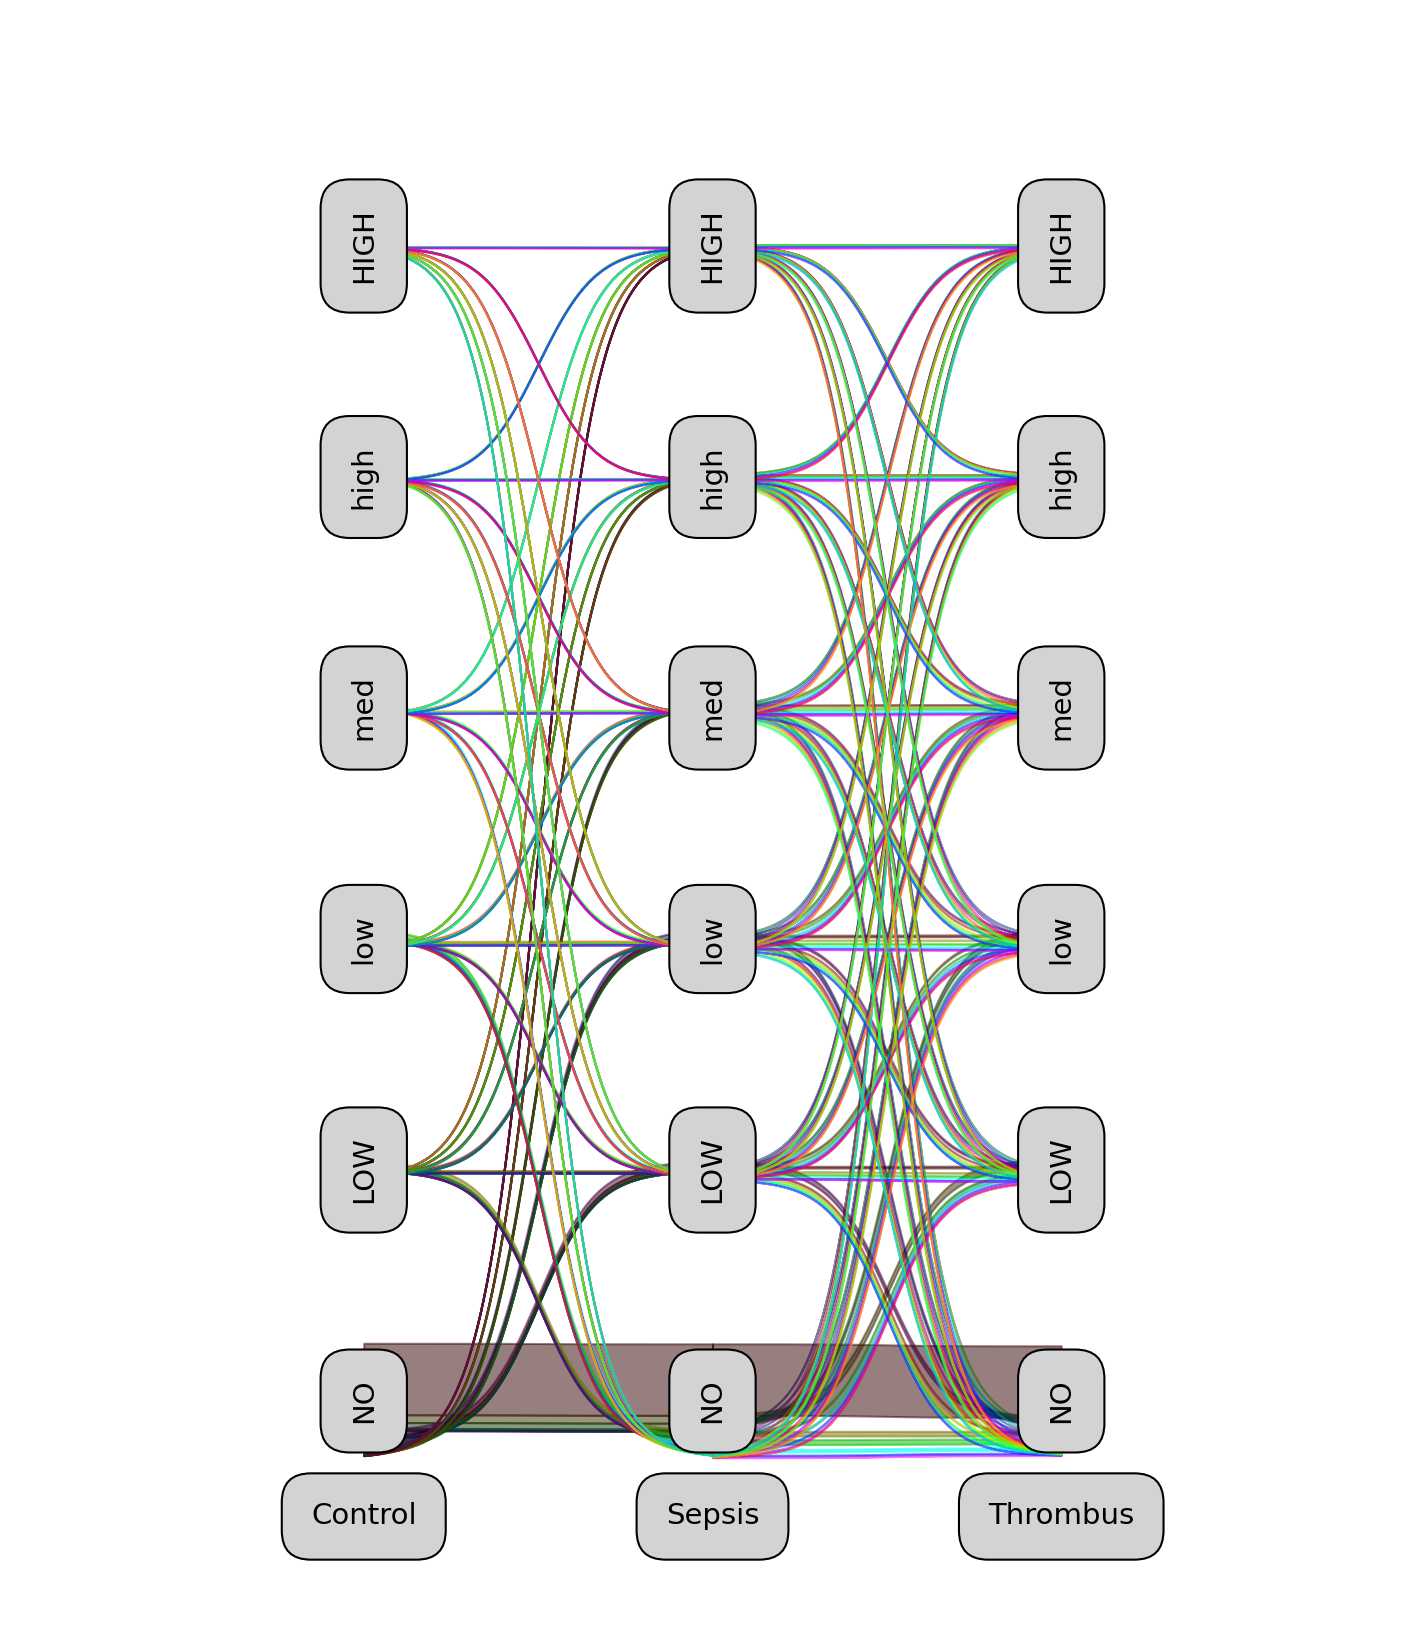

In [16]:
fa.plot_flows(min_gene_flow=0.1, verbose=True)

In [17]:
#relFlows = set.union(
#    fa.flow_finder(["<", "<="], minLevels=["NO", "NO", "LOW"], verbose=True),
#    fa.flow_finder(["=", "<"], minLevels=["NO", "NO", "LOW"], verbose=True),
#    fa.flow_finder([">", "<<"], minLevels=["NO", "NO", "LOW"], verbose=True)
#)

relFlows = fa.flow_finder(["<", ">"], minLevels=["NO", "LOW", "NO"], verbose=True)

6 [('control', 'NO'), ('sepsis', 'LOW'), ('thrombus', 'NO')]
12 [('control', 'NO'), ('sepsis', 'low'), ('thrombus', 'NO')]
13 [('control', 'NO'), ('sepsis', 'low'), ('thrombus', 'LOW')]
18 [('control', 'NO'), ('sepsis', 'med'), ('thrombus', 'NO')]
19 [('control', 'NO'), ('sepsis', 'med'), ('thrombus', 'LOW')]
20 [('control', 'NO'), ('sepsis', 'med'), ('thrombus', 'low')]
24 [('control', 'NO'), ('sepsis', 'high'), ('thrombus', 'NO')]
25 [('control', 'NO'), ('sepsis', 'high'), ('thrombus', 'LOW')]
26 [('control', 'NO'), ('sepsis', 'high'), ('thrombus', 'low')]
27 [('control', 'NO'), ('sepsis', 'high'), ('thrombus', 'med')]
30 [('control', 'NO'), ('sepsis', 'HIGH'), ('thrombus', 'NO')]
31 [('control', 'NO'), ('sepsis', 'HIGH'), ('thrombus', 'LOW')]
32 [('control', 'NO'), ('sepsis', 'HIGH'), ('thrombus', 'low')]
33 [('control', 'NO'), ('sepsis', 'HIGH'), ('thrombus', 'med')]
34 [('control', 'NO'), ('sepsis', 'HIGH'), ('thrombus', 'high')]
48 [('control', 'LOW'), ('sepsis', 'low'), ('thromb

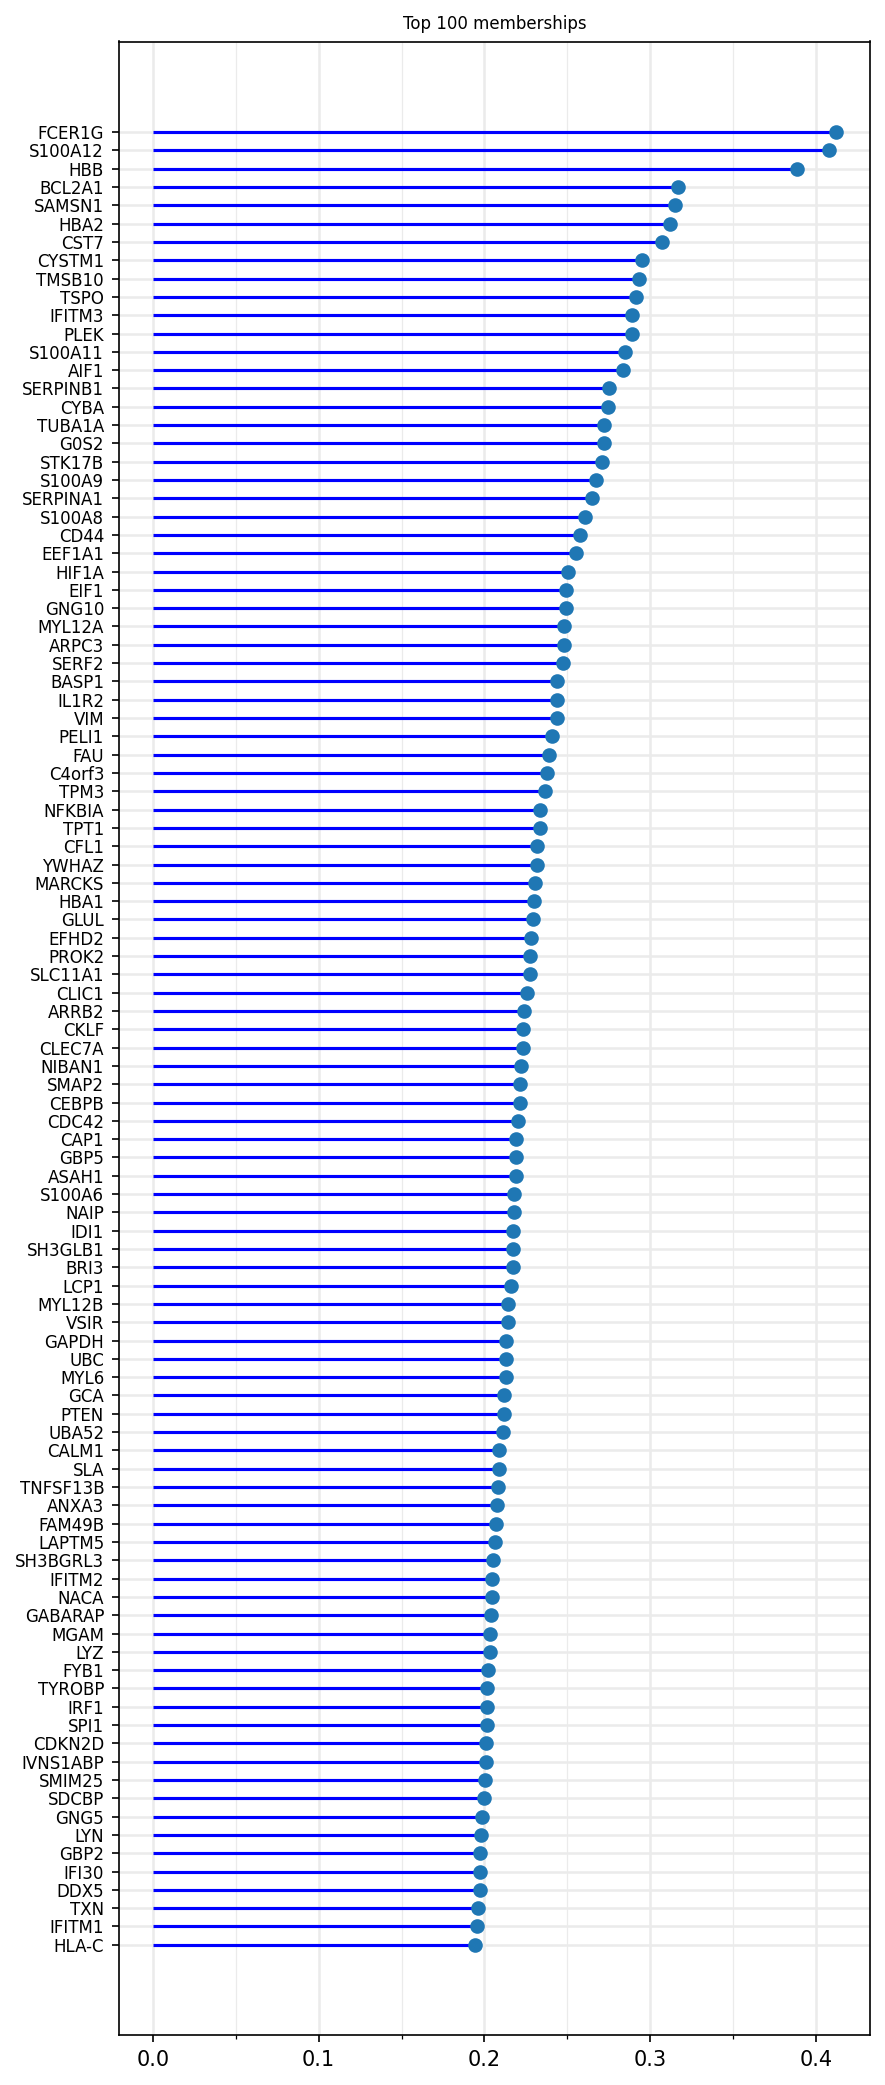

In [18]:
_=fa.plot_flow_memberships(use_flows= relFlows, n_genes=100, gene_exclude_patterns=["AC", "AL", "LINC", "MT", "RP", "RS"], figsize=(6,14), plot_histogram=False, labelsize=8)


Figure Size (12, 14)


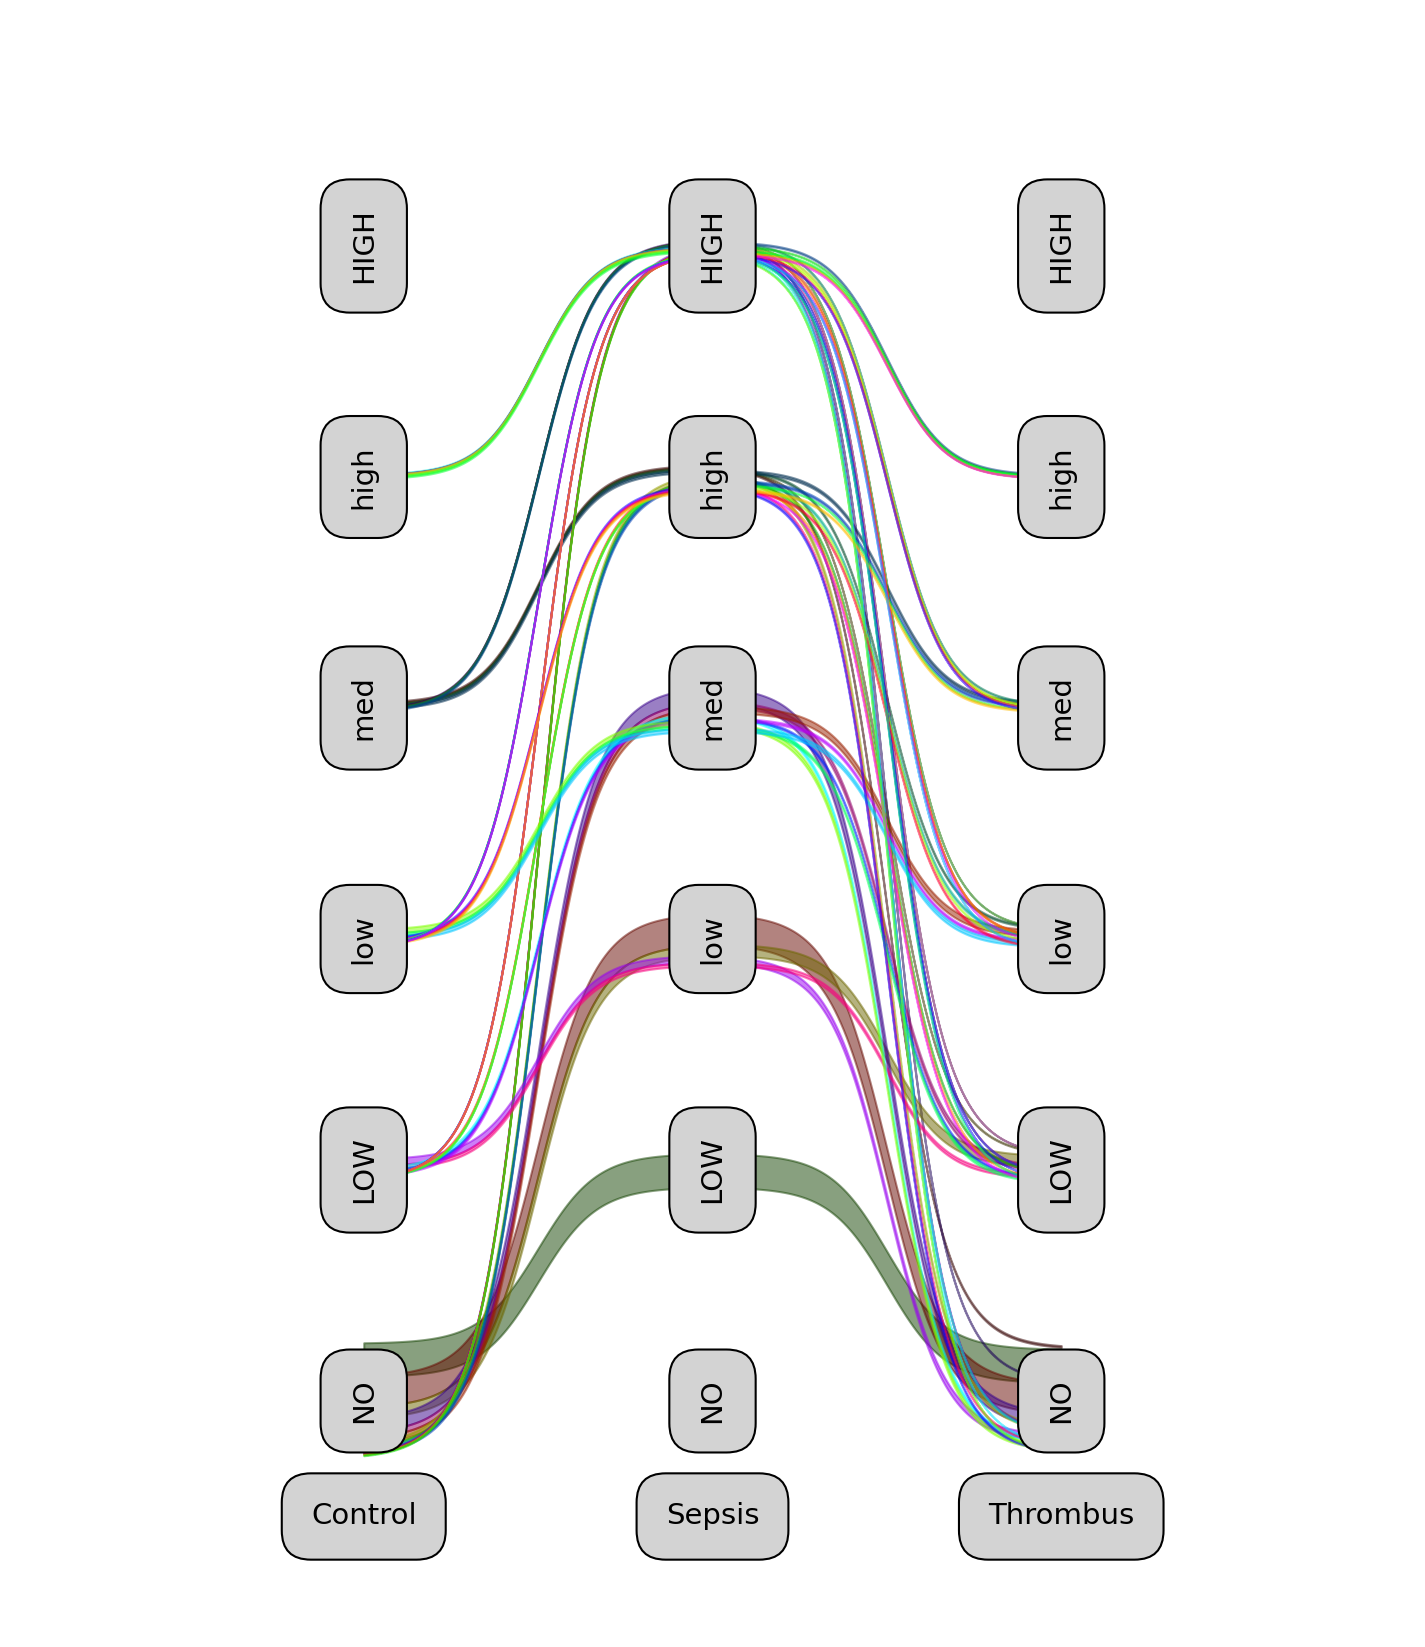

In [19]:
pathwaysFile = "go_human.bp.gmt"

plot_prefix="ctrl_thrombus_sepsis_neutro/go_ora_control_thrombus_sepsis"

fa.plot_flows(use_flows=relFlows, outfile="{}_relflows".format(plot_prefix))

In [20]:
pwScoresGOGrp = fa.analyse_pathways_grouped(pathways_file=pathwaysFile, additional_pathways=[("ISG_SHORT", isgListShort), ("ISG_LONG", isgListLong)], use_flows=relFlows)
pwScoresGOGrp

Loading pathways from go_human.bp.gmt
Identified 12535 pathways
Calculating p-values for groups [2, 10, 50, 100, 1226]


pwid                                             pwname    pwFlow   
7     GO:0010789  meiotic sister chromatid cohesion involved in ...  0.000542  \
20    GO:1900101  regulation of endoplasmic reticulum unfolded p...  0.023639   
25    GO:0043610             regulation of carbohydrate utilization  0.000000   
28    GO:0072522    purine-containing compound biosynthetic process  0.000000   
29    GO:2001145  negative regulation of phosphatidylinositol-3,...  0.015025   
...          ...                                                ...       ...   
1774  GO:0010976  positive regulation of neuron projection devel...  2.256461   
1860  GO:0001822                                 kidney development  0.944454   
1861  GO:0007568                                              aging  3.741053   
1881  GO:0018108                  peptidyl-tyrosine phosphorylation  2.433326   
2493  GO:0006457                                    protein folding  2.816759   

      pwGenes   allPwFlow    allPwGenes  pw_gene_intersection  pw_coverage   
7           1  262.630527  13107.000235                     1     0.000542  \
20          1  262.630527  13107.000235                     1     0.023639   
25          1  262.630527  13107.000235                     0     0.000000   
28          1  262.630527  13107.000235                     0     0.000000   
29          2  262.630527  13107.000235                     1     0.007513   
...       ...         ...           ...                   ...          ...   
1774      111  262.630527  13107.000235                    89     0.020328   
1860      115  262.630527  13107.000235                    84     0.008213   
1861      146  262.630527  13107.000235                   116     0.025624   
1881      139  262.630527  13107.000235                   113     0.017506   
2493      156  262.630527  13107.000235                   133     0.018056   

      genes_coverage  mean_coverage  pw_coverage_zscore      pval  adj_pval  
7           0.000002   1.117524e-09           -0.606180  1.000000       1.0  
20          0.000090   2.127630e-06           -0.087529  1.000000       1.0  
25          0.000000   0.000000e+00           -0.618345  1.000000       1.0  
28          0.000000   0.000000e+00           -0.618345  1.000000       1.0  
29          0.000057   4.298092e-07           -0.449644  1.000000       1.0  
...              ...            ...                 ...       ...       ...  
1774        0.008592   1.746576e-04            0.001439  0.499426       1.0  
1860        0.003596   2.953375e-05           -1.173250  1.000000       1.0  
1861        0.014245   3.649974e-04            0.514833  0.303335       1.0  
1881        0.009265   1.621962e-04           -0.272219  1.000000       1.0  
2493        0.010725   1.936554e-04           -0.218874  1.000000       1.0  

[12537 rows x 13 columns]

pwid                                             pwname   
6081   GO:0002181                            cytoplasmic translation  \
11212  GO:0002292  T cell differentiation involved in immune resp...   
75     GO:0006412                                        translation   
6320   GO:0002431  Fc receptor mediated stimulatory signaling pat...   
5514   GO:2001198       regulation of dendritic cell differentiation   
12365  GO:0015990        electron transport coupled proton transport   
5813   GO:0042590  antigen processing and presentation of exogeno...   
8072   GO:0038156           interleukin-3-mediated signaling pathway   
6054   GO:0030185                             nitric oxide transport   
2460   GO:0035456                        response to interferon-beta   
4837   GO:1904667  negative regulation of ubiquitin protein ligas...   
5879   GO:0045730                                  respiratory burst   
3669   GO:0071727  cellular response to triacyl bacterial lipopep...   
5964   GO:0070488                             neutrophil aggregation   
7070   GO:0035455                       response to interferon-alpha   
3414   GO:0032930  positive regulation of superoxide anion genera...   
6471   GO:0042274                 ribosomal small subunit biogenesis   
963    GO:0070427  nucleotide-binding oligomerization domain cont...   
5962   GO:0032119                           sequestering of zinc ion   
5807   GO:0035606            peptidyl-cysteine S-trans-nitrosylation   
3419   GO:1904151  positive regulation of microglial cell mediate...   
7661   GO:0097340  inhibition of cysteine-type endopeptidase acti...   
6122   GO:0038094                Fc-gamma receptor signaling pathway   
4571   GO:1902524  positive regulation of protein K48-linked ubiq...   
9433   GO:0001738            morphogenesis of a polarized epithelium   
3718   GO:0060333      type II interferon-mediated signaling pathway   
2871   GO:0150111            regulation of transepithelial transport   
4312   GO:0032226  positive regulation of synaptic transmission, ...   
6641   GO:0002540  leukotriene production involved in inflammator...   
2462   GO:0060368  regulation of Fc receptor mediated stimulatory...   
6701   GO:1905913  negative regulation of calcium ion export acro...   
4807   GO:0033119                negative regulation of RNA splicing   
74     GO:0000028                   ribosomal small subunit assembly   
5882   GO:1904845                   cellular response to L-glutamine   
6285   GO:0048002  antigen processing and presentation of peptide...   
5955   GO:0043315    positive regulation of neutrophil degranulation   
8821   GO:0048102                              autophagic cell death   
5884   GO:0140199  negative regulation of adenylate cyclase-activ...   
2461   GO:0050765                negative regulation of phagocytosis   
8673   GO:0019941   modification-dependent protein catabolic process   
4722   GO:0002790                                  peptide secretion   
6699   GO:0140056       organelle localization by membrane tethering   
7963   GO:0035771           interleukin-4-mediated signaling pathway   
7589   GO:0046074                             dTMP catabolic process   
6696   GO:0051343  positive regulation of cyclic-nucleotide phosp...   
7144   GO:0002820    negative regulation of adaptive immune response   
4123   GO:0048024       regulation of mRNA splicing, via spliceosome   
5776   GO:1902992  negative regulation of amyloid precursor prote...   
8063   GO:1904582  positive regulation of intracellular mRNA loca...   
5961   GO:0018119                  peptidyl-cysteine S-nitrosylation   

          pwFlow  pwGenes   allPwFlow    allPwGenes  pw_gene_intersection   
6081   14.649983       89  262.630527  13107.000235                    87  \
11212   0.659844        3  262.630527  13107.000235                     3   
75     15.747188      174  262.630527  13107.000235                   160   
6320    0.609823        2  262.6

Index(['pwid', 'pwname', 'pwFlow', 'pwGenes', 'allPwFlow', 'allPwGenes',
       'pw_gene_intersection', 'pw_coverage', 'genes_coverage',
       'mean_coverage', 'pw_coverage_zscore', 'pval', 'adj_pval'],
      dtype='object')
False
False
(50, 14)


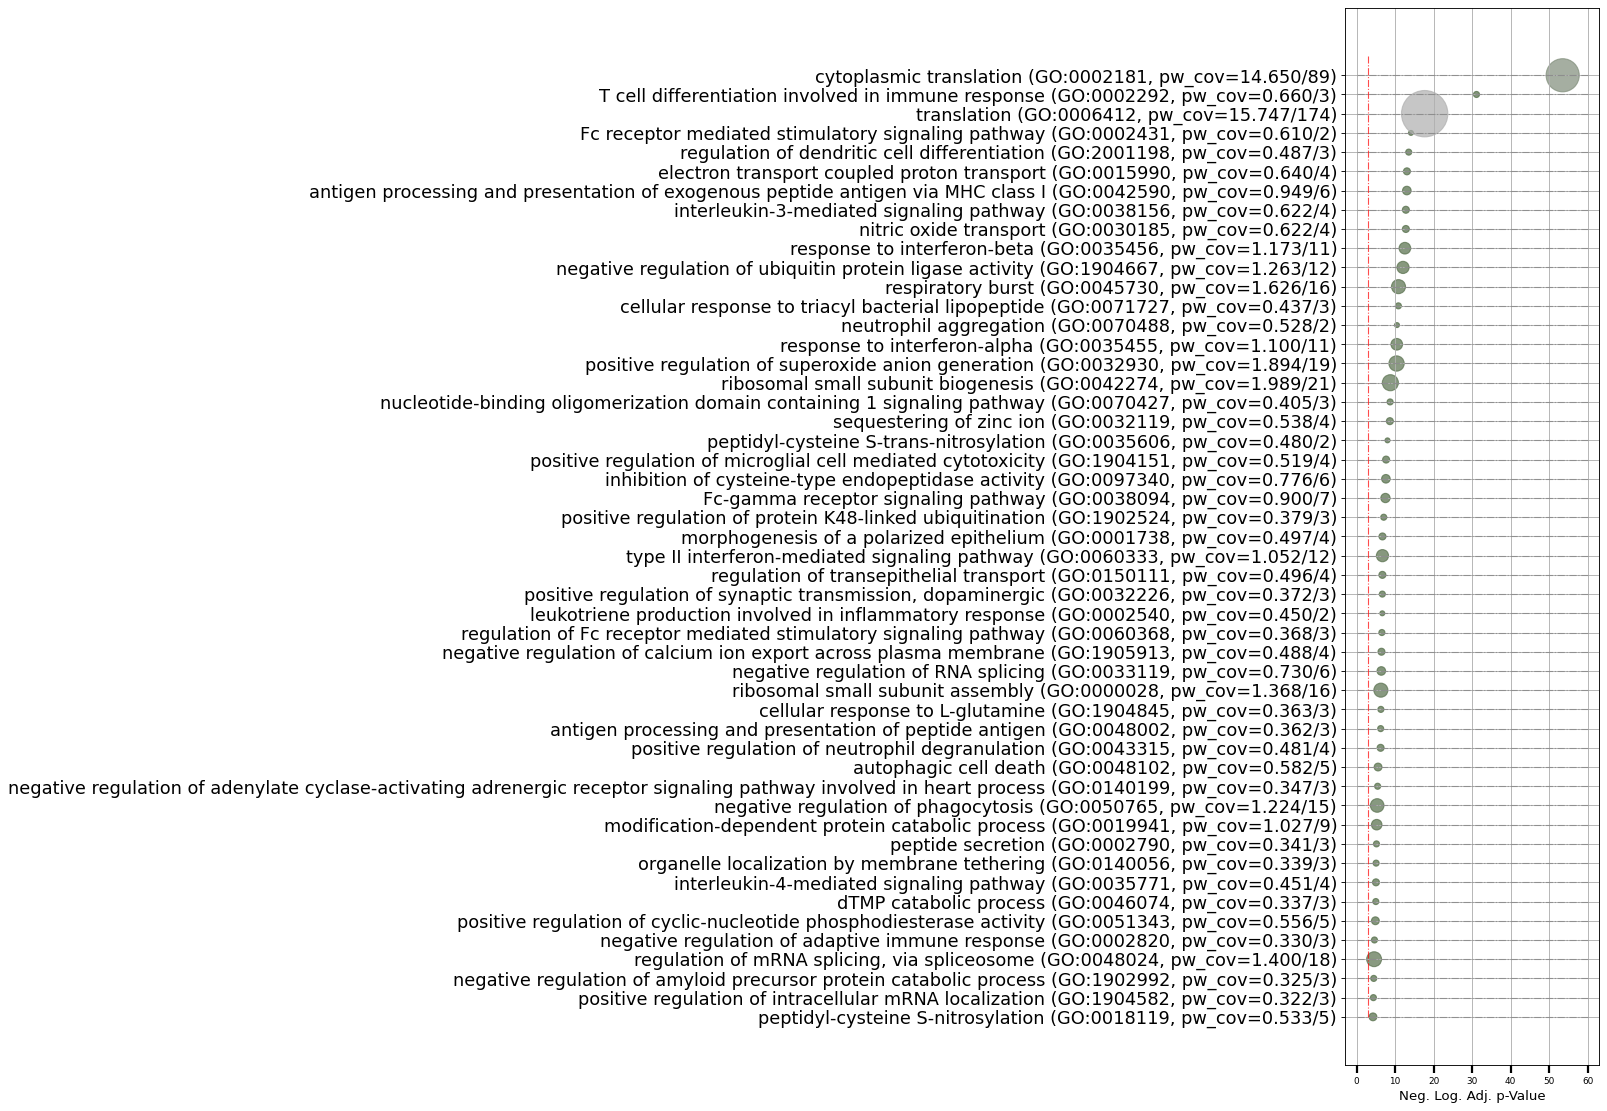

In [21]:
selPWsGOGrp = pwScoresGOGrp[(pwScoresGOGrp["pwGenes"] > 1) & (pwScoresGOGrp["adj_pval"] < 0.05)].sort_values("adj_pval", ascending=True).head(50)
display(selPWsGOGrp)
fa.plotORAresult(selPWsGOGrp, "", numResults=selPWsGOGrp.shape[0], figsize=(14,14), outfile=plot_prefix)

In [22]:
pwScoresGOGrp[pwScoresGOGrp.pwid == "GO:0045087"]

pwid                  pwname     pwFlow  pwGenes   allPwFlow   
1  GO:0045087  innate immune response  15.370453      478  262.630527  \

     allPwGenes  pw_gene_intersection  pw_coverage  genes_coverage   
1  13107.000235                   378     0.032156        0.058525  \

   mean_coverage  pw_coverage_zscore      pval  adj_pval  
1       0.001882            1.148152  0.125453       1.0

In [23]:
pws = fa.get_pathways(pathwaysFile)

Loading pathways from go_human.bp.gmt
Identified 12535 pathways


Figure Size (12, 14)
Adding title regulation of cell-cell adhesion mediated by integrin


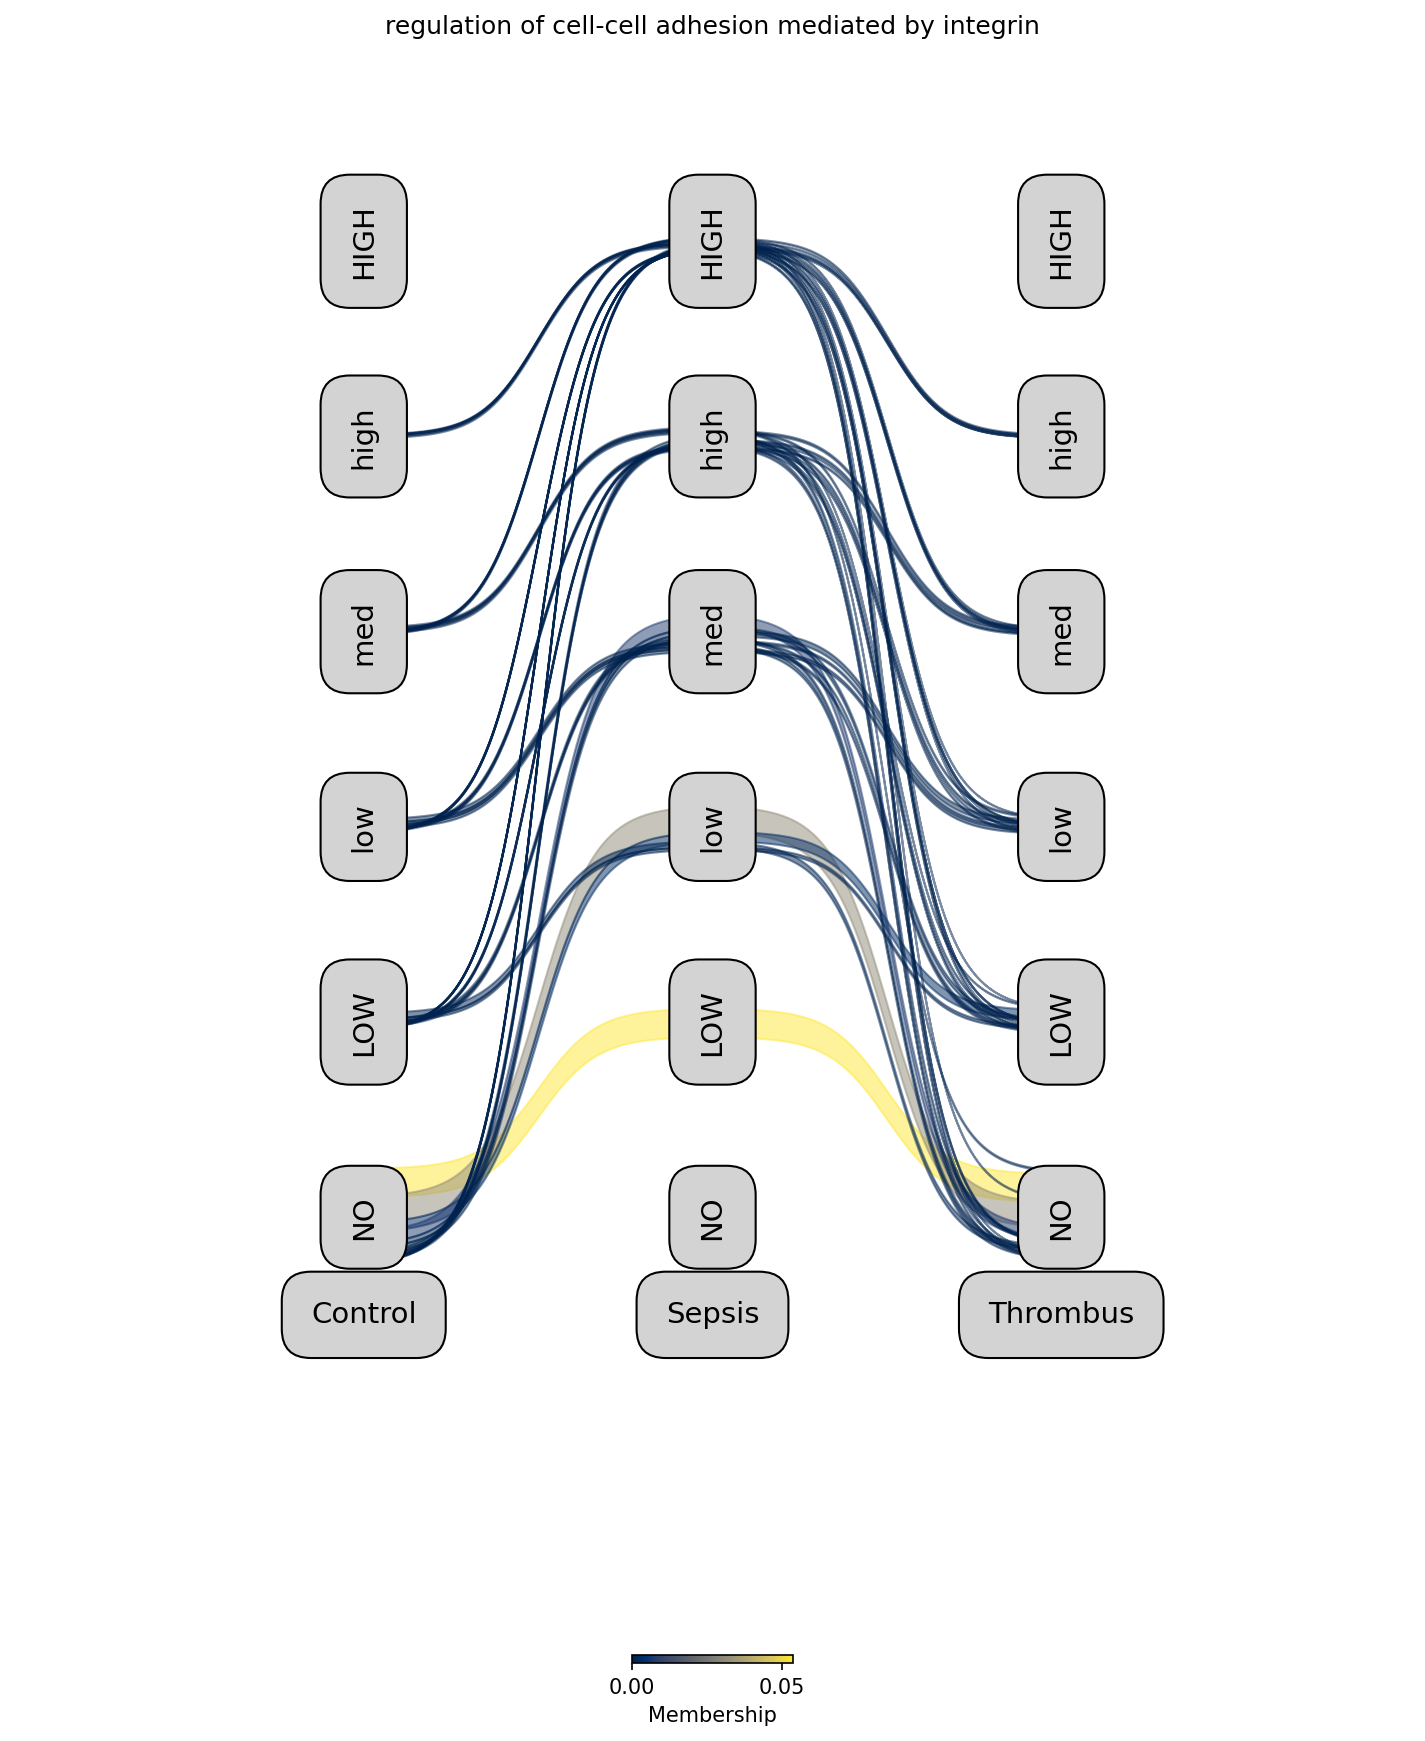

In [24]:
ppw = pws["GO:0033632"]
fa.visualize_genes(genes=ppw[1], use_flows=relFlows, outfile="{}_go0033632".format(plot_prefix), title=ppw[0])

Figure Size (12, 14)
Adding title innate immune response


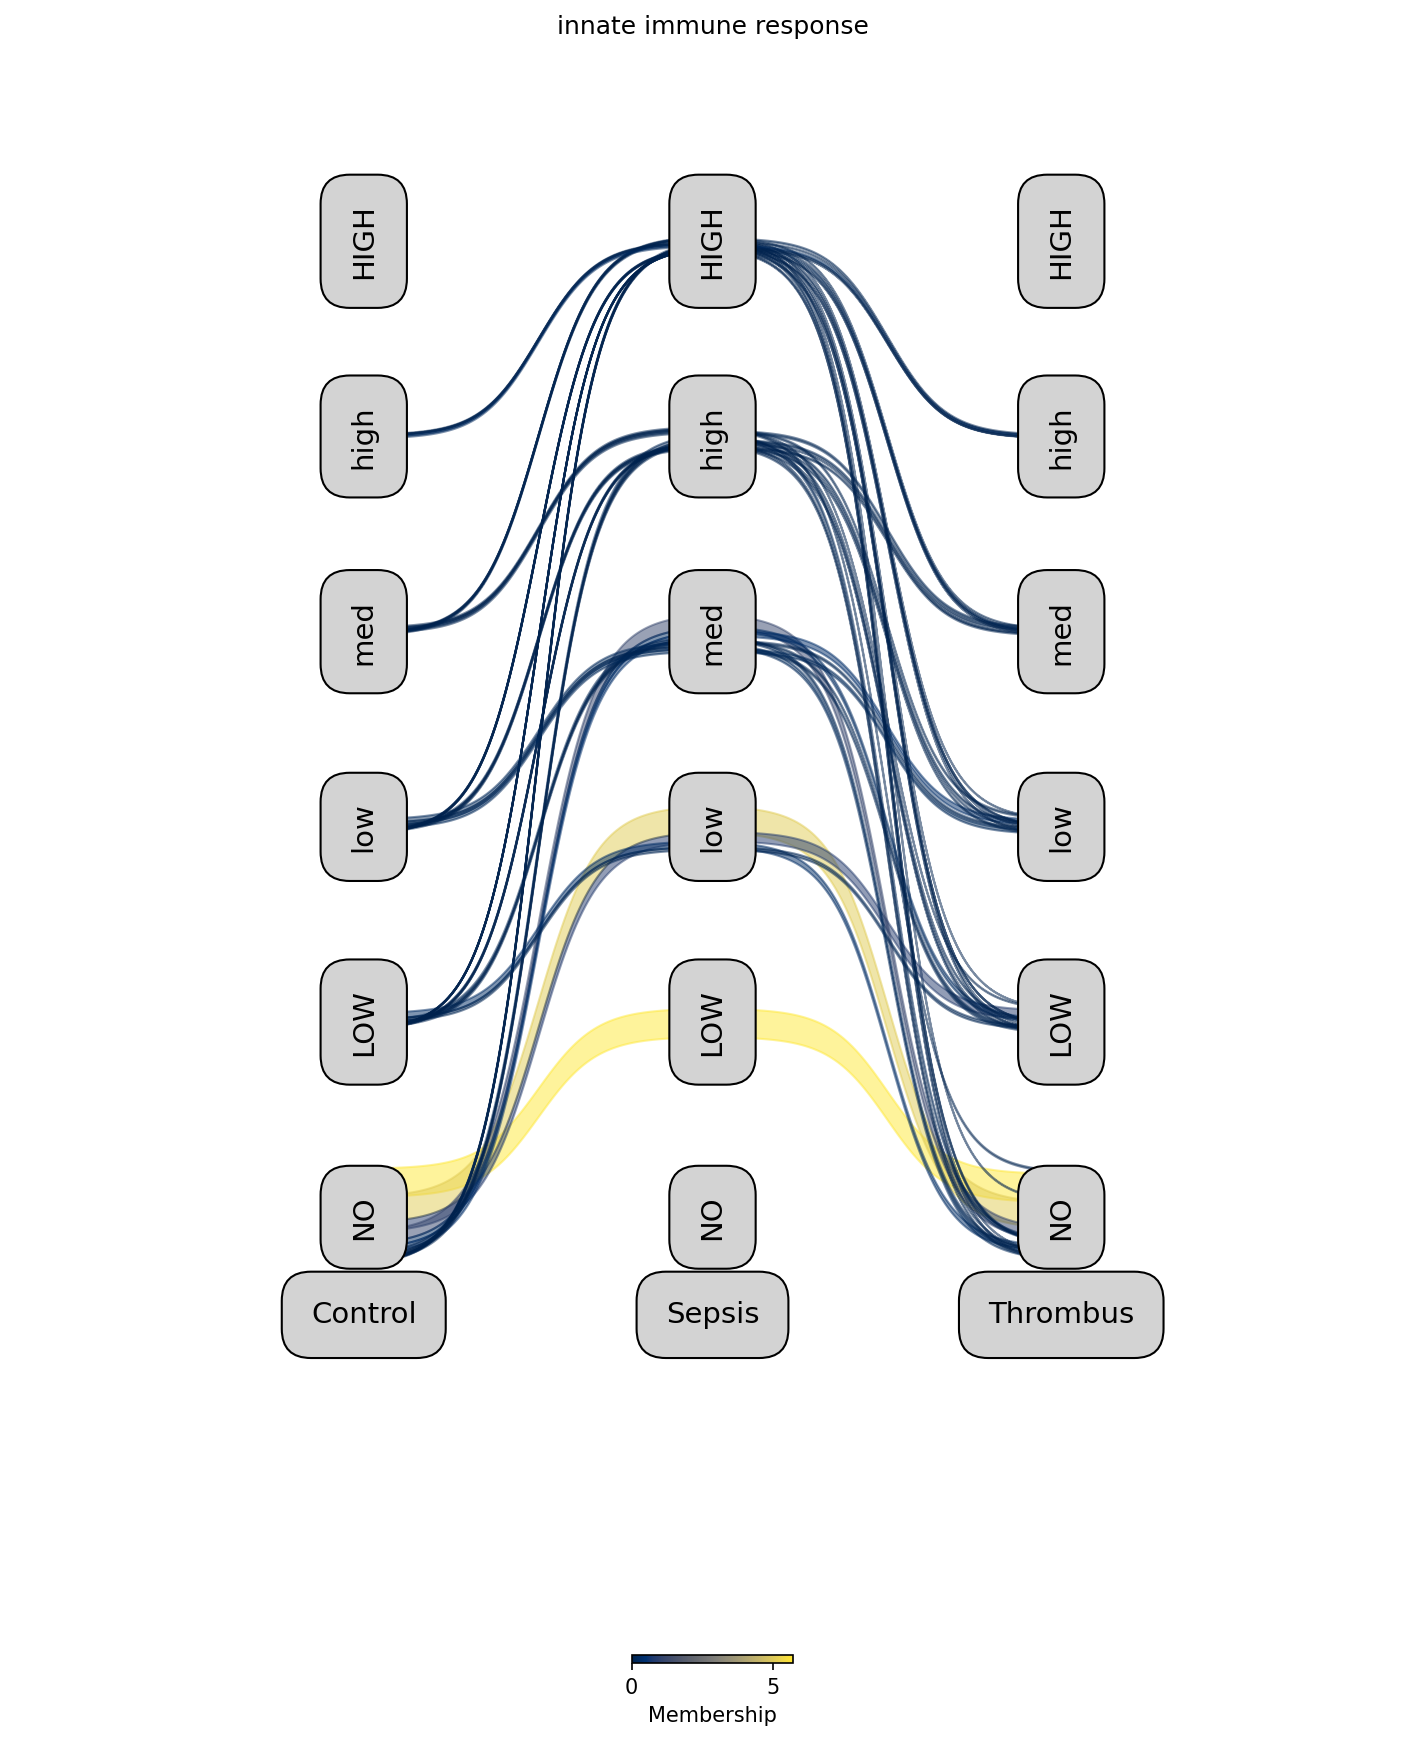

In [25]:
ppw = pws["GO:0045087"]
fa.visualize_genes(genes=ppw[1], use_flows=relFlows, outfile="{}_go0045087".format(plot_prefix), title=ppw[0])

In [26]:
relFlows = fa.flow_finder(["<", ">"], minLevels=["NO", "med", "NO"], verbose=True)
pwScoresGOGrp2 = fa.analyse_pathways_grouped(pathways_file=pathwaysFile, additional_pathways=[("ISG_SHORT", isgListShort), ("ISG_LONG", isgListLong)], use_flows=relFlows)
pwScoresGOGrp2

18 [('control', 'NO'), ('sepsis', 'med'), ('thrombus', 'NO')]
19 [('control', 'NO'), ('sepsis', 'med'), ('thrombus', 'LOW')]
20 [('control', 'NO'), ('sepsis', 'med'), ('thrombus', 'low')]
24 [('control', 'NO'), ('sepsis', 'high'), ('thrombus', 'NO')]
25 [('control', 'NO'), ('sepsis', 'high'), ('thrombus', 'LOW')]
26 [('control', 'NO'), ('sepsis', 'high'), ('thrombus', 'low')]
27 [('control', 'NO'), ('sepsis', 'high'), ('thrombus', 'med')]
30 [('control', 'NO'), ('sepsis', 'HIGH'), ('thrombus', 'NO')]
31 [('control', 'NO'), ('sepsis', 'HIGH'), ('thrombus', 'LOW')]
32 [('control', 'NO'), ('sepsis', 'HIGH'), ('thrombus', 'low')]
33 [('control', 'NO'), ('sepsis', 'HIGH'), ('thrombus', 'med')]
34 [('control', 'NO'), ('sepsis', 'HIGH'), ('thrombus', 'high')]
54 [('control', 'LOW'), ('sepsis', 'med'), ('thrombus', 'NO')]
55 [('control', 'LOW'), ('sepsis', 'med'), ('thrombus', 'LOW')]
56 [('control', 'LOW'), ('sepsis', 'med'), ('thrombus', 'low')]
60 [('control', 'LOW'), ('sepsis', 'high'), ('

pwid                                             pwname    pwFlow   
7     GO:0010789  meiotic sister chromatid cohesion involved in ...  0.000009  \
20    GO:1900101  regulation of endoplasmic reticulum unfolded p...  0.001282   
25    GO:0043610             regulation of carbohydrate utilization  0.000000   
28    GO:0072522    purine-containing compound biosynthetic process  0.000000   
29    GO:2001145  negative regulation of phosphatidylinositol-3,...  0.000316   
...          ...                                                ...       ...   
1774  GO:0010976  positive regulation of neuron projection devel...  0.601174   
1860  GO:0001822                                 kidney development  0.111939   
1861  GO:0007568                                              aging  1.086480   
1881  GO:0018108                  peptidyl-tyrosine phosphorylation  0.464358   
2493  GO:0006457                                    protein folding  0.291154   

      pwGenes  allPwFlow    allPwGenes  pw_gene_intersection  pw_coverage   
7           1  41.446292  13107.000235                     1     0.000009  \
20          1  41.446292  13107.000235                     1     0.001282   
25          1  41.446292  13107.000235                     0     0.000000   
28          1  41.446292  13107.000235                     0     0.000000   
29          2  41.446292  13107.000235                     1     0.000158   
...       ...        ...           ...                   ...          ...   
1774      111  41.446292  13107.000235                    89     0.005416   
1860      115  41.446292  13107.000235                    84     0.000973   
1861      146  41.446292  13107.000235                   116     0.007442   
1881      139  41.446292  13107.000235                   113     0.003341   
2493      156  41.446292  13107.000235                   133     0.001866   

      genes_coverage  mean_coverage  pw_coverage_zscore      pval  adj_pval  
7       2.283005e-07   2.160227e-12           -0.306808  1.000000       1.0  
20      3.092780e-05   3.964458e-08           -0.238136  1.000000       1.0  
25      0.000000e+00   0.000000e+00           -0.307318  1.000000       1.0  
28      0.000000e+00   0.000000e+00           -0.307318  1.000000       1.0  
29      7.617629e-06   1.202528e-09           -0.298799  1.000000       1.0  
...              ...            ...                 ...       ...       ...  
1774    1.450489e-02   7.855825e-05            0.683850  0.247035       1.0  
1860    2.700814e-03   2.628918e-06           -0.865697  1.000000       1.0  
1861    2.621416e-02   1.950764e-04            1.390385  0.082206       1.0  
1881    1.120384e-02   3.742868e-05           -0.039993  1.000000       1.0  
2493    7.024857e-03   1.311101e-05           -0.554228  1.000000       1.0  

[12537 rows x 13 columns]

pwid                                             pwname    pwFlow   
6081  GO:0002181                            cytoplasmic translation  4.547339  \
5410  GO:0002523  leukocyte migration involved in inflammatory r...  0.570682   
5963  GO:0035425                                autocrine signaling  0.527943   
75    GO:0006412                                        translation  4.674773   
5513  GO:0042270  protection from natural killer cell mediated c...  0.390157   
936   GO:0014002                              astrocyte development  0.641372   
3432  GO:0002544                      chronic inflammatory response  0.542368   
2460  GO:0035456                        response to interferon-beta  0.403829   
7070  GO:0035455                       response to interferon-alpha  0.398078   
5510  GO:0002486  antigen processing and presentation of endogen...  0.571516   
7114  GO:0002476  antigen processing and presentation of endogen...  0.571516   
5527  GO:0015670                           carbon dioxide transport  0.464077   
5813  GO:0042590  antigen processing and presentation of exogeno...  0.327531   
5685  GO:0006880             intracellular sequestering of iron ion  0.320097   
6327  GO:0045646          regulation of erythrocyte differentiation  0.319841   
2570  GO:0050832                         defense response to fungus  1.002563   
2995  GO:0002726  positive regulation of T cell cytokine production  0.345222   
74    GO:0000028                   ribosomal small subunit assembly  0.499354   
5250  GO:0015671                                   oxygen transport  0.467219   
6811  GO:0045576                               mast cell activation  0.332069   

      pwGenes  allPwFlow    allPwGenes  pw_gene_intersection  pw_coverage   
6081       89  41.446292  13107.000235                    87     0.051094  \
5410       12  41.446292  13107.000235                    10     0.047557   
5963        7  41.446292  13107.000235                     6     0.075420   
75        174  41.446292  13107.000235                   160     0.026867   
5513        6  41.446292  13107.000235                     5     0.065026   
936        16  41.446292  13107.000235                    11     0.040086   
3432        9  41.446292  13107.000235                     6     0.060263   
2460       11  41.446292  13107.000235                    10     0.036712   
7070       11  41.446292  13107.000235                    10     0.036189   
5510       16  41.446292  13107.000235                    12     0.035720   
7114       16  41.446292  13107.000235                    12     0.035720   
5527       13  41.446292  13107.000235                     9     0.035698   
5813        6  41.446292  13107.000235                     6     0.054588   
5685        6  41.446292  13107.000235                     3     0.053349   
6327        6  41.446292  13107.000235                     6     0.053307   
2570       31  41.446292  13107.000235                    21     0.032341   
2995       11  41.446292  13107.000235                    11     0.031384   
74         16  41.446292  13107.000235                    13     0.031210   
5250       15  41.446292  13107.000235                    12     0.031148   
6811        7  41.446292  13107.000235                     6     0.047438   

      genes_coverage  mean_coverage  pw_coverage_zscore          pval   
6081        0.109716       0.005606           11.684255  7.670948e-32  \
5410        0.013769       0.000655            9.232060  1.327381e-20   
5963        0.012738       0.000961            9.005792  1.070576e-19   
75          0.112791       0.003030            8.165634  1.598759e-16   
5513        0.009414       0.000612            7.701889  6.703479e-15   
936         0.015475       0.000620            7.660681  9.247456e-15   
3432        0.013086       0.000789            7.104397  6.042454e-13   
2460        0.009743       0.000358            6.951028  1.813174e-12   
7070        0.009605       0.000348

Index(['pwid', 'pwname', 'pwFlow', 'pwGenes', 'allPwFlow', 'allPwGenes',
       'pw_gene_intersection', 'pw_coverage', 'genes_coverage',
       'mean_coverage', 'pw_coverage_zscore', 'pval', 'adj_pval'],
      dtype='object')
False
False
(20, 14)


/usr/local/hdd2/data/plaque_ims/sepsis_data/../FlowSets/flowset.py:1865: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


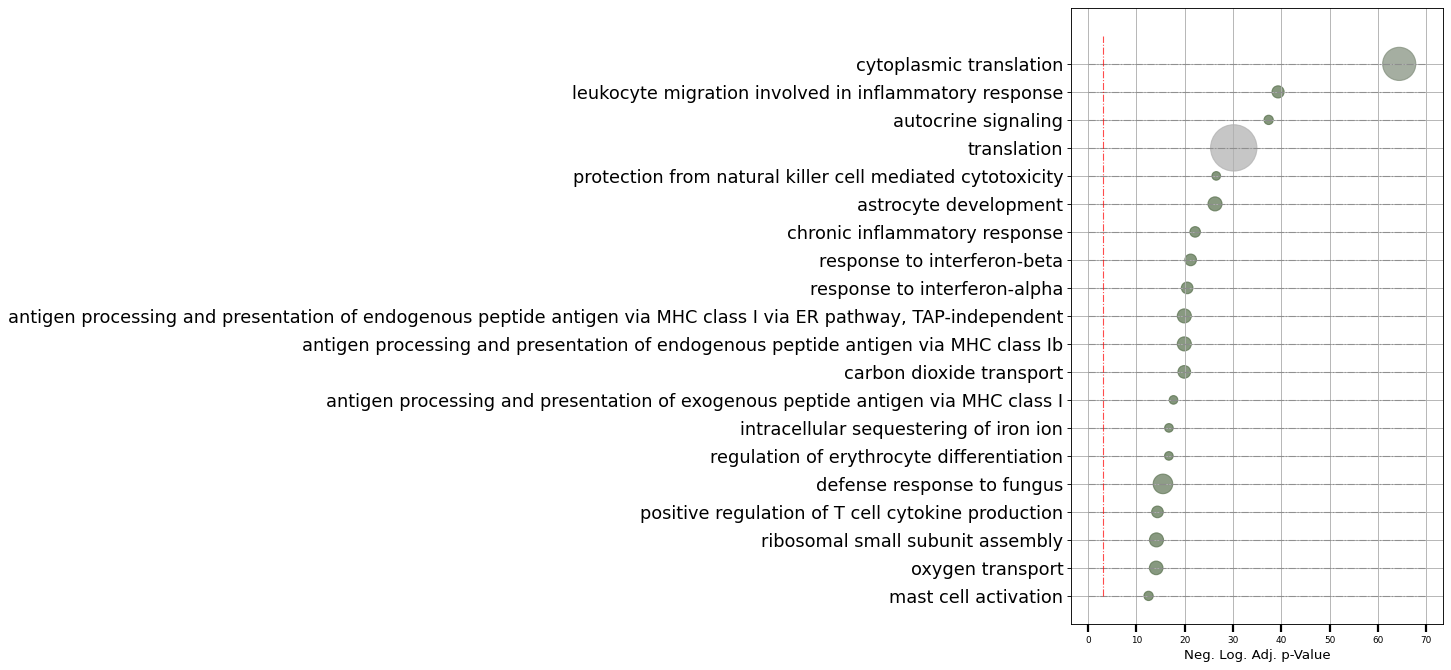

ctrl_thrombus_sepsis_neutro/go_ora_control_thrombus_sepsis


In [27]:
selPWsGOGrp2 = pwScoresGOGrp2[(pwScoresGOGrp2["pwGenes"] > 5) & (pwScoresGOGrp2["adj_pval"] < 0.05)].sort_values("adj_pval", ascending=True).head(20)
display(selPWsGOGrp2)
fa.plotORAresult(selPWsGOGrp2, "", numResults=selPWsGOGrp2.shape[0], figsize=(6, 10), outfile=plot_prefix + "_low", sep="\n",entryformat="{x}")
print(plot_prefix)

selPWsGOGrp2 = pwScoresGOGrp2[(pwScoresGOGrp2["pwGenes"] > 5) & (pwScoresGOGrp2["adj_pval"] < 0.05)].sort_values("adj_pval", ascending=True)
selPWsGOGrp2.to_csv(plot_prefix + "_low_table.tsv", sep="\t")
selPWsGOGrp2.to_excel(plot_prefix + "_low_table.xlsx")

In [28]:
selPWsGOGrp2 = pwScoresGOGrp2[(pwScoresGOGrp2["pwGenes"] > 5) & (pwScoresGOGrp2["adj_pval"] < 0.05)].sort_values("adj_pval", ascending=True)
selPWsGOGrp2.to_csv(plot_prefix + "_low_table.tsv", sep="\t")
selPWsGOGrp2.to_excel(plot_prefix + "_low_table.xlsx")

pwid                                             pwname    pwFlow   
6081  GO:0002181                            cytoplasmic translation  4.547339  \
5410  GO:0002523  leukocyte migration involved in inflammatory r...  0.570682   
5963  GO:0035425                                autocrine signaling  0.527943   
75    GO:0006412                                        translation  4.674773   
5513  GO:0042270  protection from natural killer cell mediated c...  0.390157   
936   GO:0014002                              astrocyte development  0.641372   
3432  GO:0002544                      chronic inflammatory response  0.542368   
2460  GO:0035456                        response to interferon-beta  0.403829   
7070  GO:0035455                       response to interferon-alpha  0.398078   
5510  GO:0002486  antigen processing and presentation of endogen...  0.571516   
7114  GO:0002476  antigen processing and presentation of endogen...  0.571516   
5527  GO:0015670                           carbon dioxide transport  0.464077   
5813  GO:0042590  antigen processing and presentation of exogeno...  0.327531   
5685  GO:0006880             intracellular sequestering of iron ion  0.320097   
6327  GO:0045646          regulation of erythrocyte differentiation  0.319841   
2570  GO:0050832                         defense response to fungus  1.002563   
2995  GO:0002726  positive regulation of T cell cytokine production  0.345222   
74    GO:0000028                   ribosomal small subunit assembly  0.499354   
5250  GO:0015671                                   oxygen transport  0.467219   
6811  GO:0045576                               mast cell activation  0.332069   

      pwGenes  allPwFlow    allPwGenes  pw_gene_intersection  pw_coverage   
6081       89  41.446292  13107.000235                    87     0.051094  \
5410       12  41.446292  13107.000235                    10     0.047557   
5963        7  41.446292  13107.000235                     6     0.075420   
75        174  41.446292  13107.000235                   160     0.026867   
5513        6  41.446292  13107.000235                     5     0.065026   
936        16  41.446292  13107.000235                    11     0.040086   
3432        9  41.446292  13107.000235                     6     0.060263   
2460       11  41.446292  13107.000235                    10     0.036712   
7070       11  41.446292  13107.000235                    10     0.036189   
5510       16  41.446292  13107.000235                    12     0.035720   
7114       16  41.446292  13107.000235                    12     0.035720   
5527       13  41.446292  13107.000235                     9     0.035698   
5813        6  41.446292  13107.000235                     6     0.054588   
5685        6  41.446292  13107.000235                     3     0.053349   
6327        6  41.446292  13107.000235                     6     0.053307   
2570       31  41.446292  13107.000235                    21     0.032341   
2995       11  41.446292  13107.000235                    11     0.031384   
74         16  41.446292  13107.000235                    13     0.031210   
5250       15  41.446292  13107.000235                    12     0.031148   
6811        7  41.446292  13107.000235                     6     0.047438   

      genes_coverage  mean_coverage  pw_coverage_zscore          pval   
6081        0.109716       0.005606           11.684255  7.670948e-32  \
5410        0.013769       0.000655            9.232060  1.327381e-20   
5963        0.012738       0.000961            9.005792  1.070576e-19   
75          0.112791       0.003030            8.165634  1.598759e-16   
5513        0.009414       0.000612            7.701889  6.703479e-15   
936         0.015475       0.000620            7.660681  9.247456e-15   
3432        0.013086       0.000789            7.104397  6.042454e-13   
2460        0.009743       0.000358            6.951028  1.813174e-12   
7070        0.009605       0.000348

Index(['pwid', 'pwname', 'pwFlow', 'pwGenes', 'allPwFlow', 'allPwGenes',
       'pw_gene_intersection', 'pw_coverage', 'genes_coverage',
       'mean_coverage', 'pw_coverage_zscore', 'pval', 'adj_pval'],
      dtype='object')
False
False
(20, 14)


/usr/local/hdd2/data/plaque_ims/sepsis_data/../FlowSets/flowset.py:1865: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


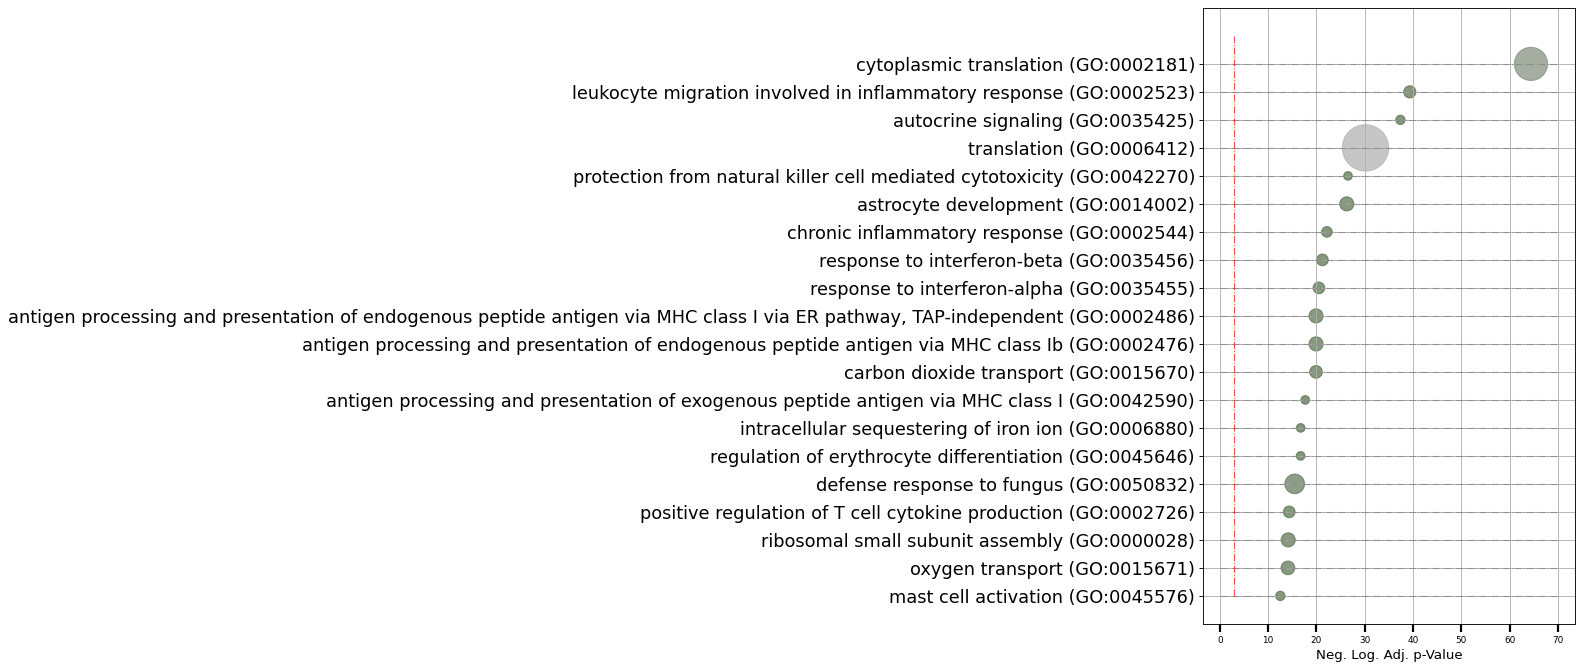

ctrl_thrombus_sepsis_neutro/go_ora_control_thrombus_sepsis


In [29]:
selPWsGOGrp2 = pwScoresGOGrp2[(pwScoresGOGrp2["pwGenes"] > 5) & (pwScoresGOGrp2["adj_pval"] < 0.05)].sort_values("adj_pval", ascending=True).head(20)
display(selPWsGOGrp2)
fa.plotORAresult(selPWsGOGrp2, "", numResults=selPWsGOGrp2.shape[0], figsize=(6, 10), outfile=plot_prefix + "_low_with_go", sep=" ",entryformat="{x}{sep}({y})")
print(plot_prefix)

Figure Size (6, 9)


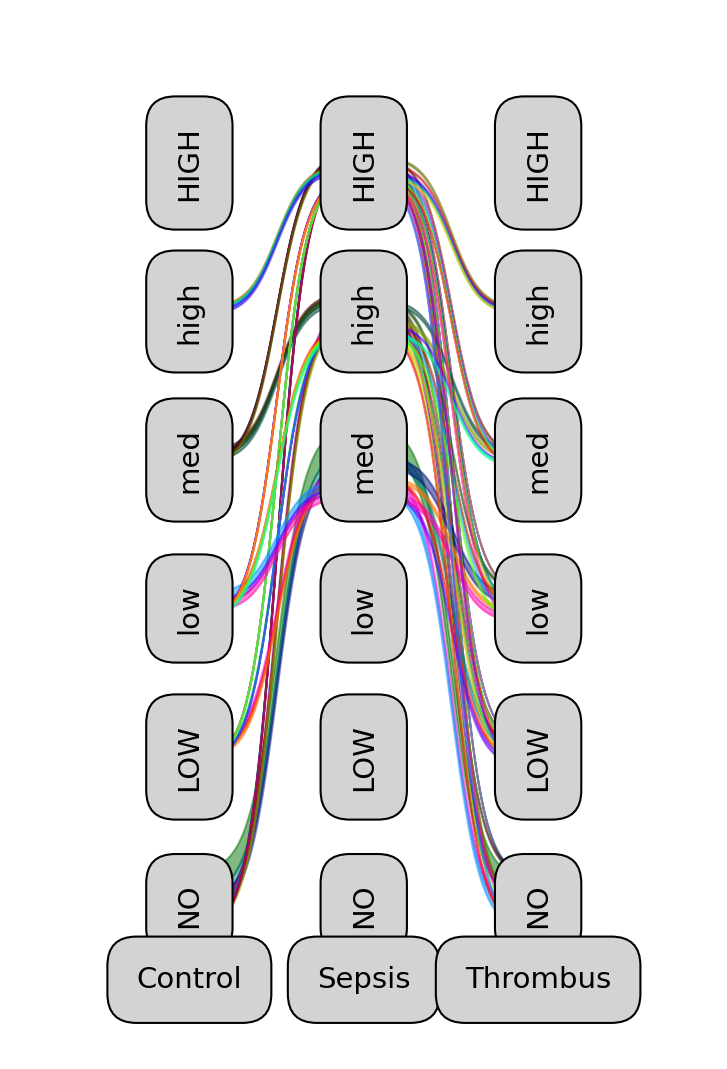

In [30]:
fa.plot_flows(use_flows=relFlows, figsize=(6,9), outfile=plot_prefix + "_relflows_low")

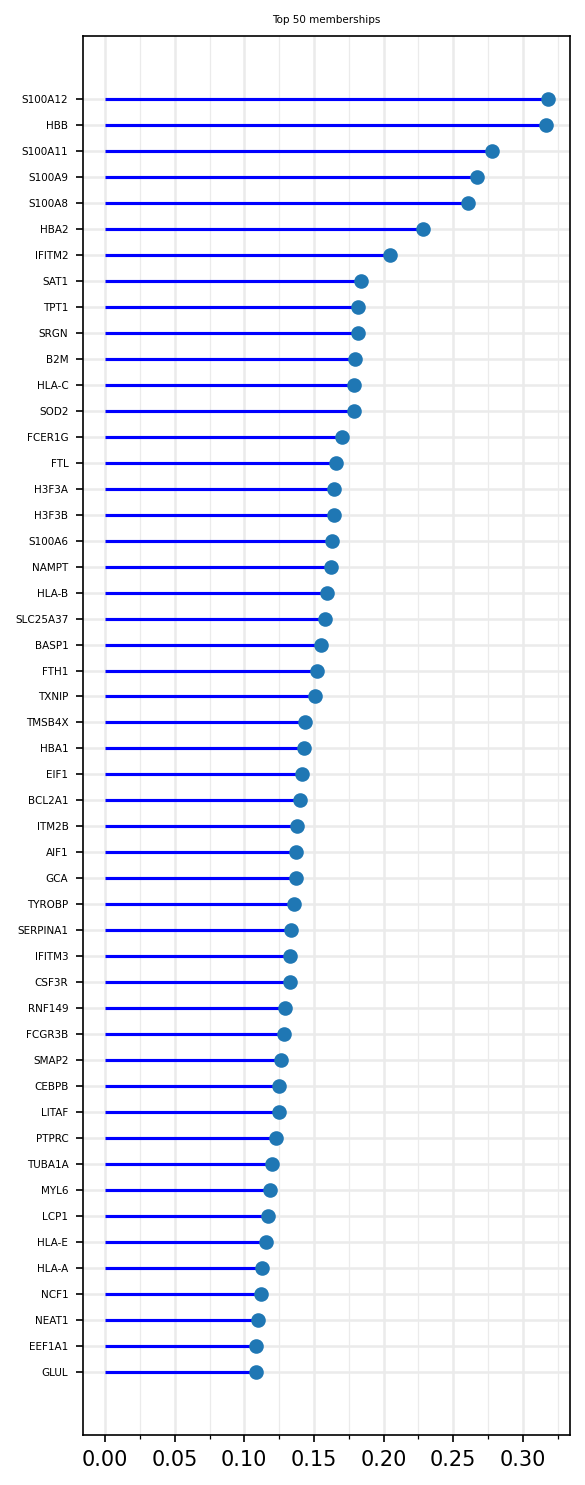

In [31]:
topgenes, topDF, _ = fa.plot_flow_memberships(use_flows=relFlows, n_genes=50, gene_exclude_patterns=["AC", "AL", "LINC", "MT", "RP", "RS"], figsize=(4,10), plot_histogram=False, labelsize=5, outfile=plot_prefix + "_top50membership_low")

In [32]:
len(topgenes)

50

In [33]:
topDF.write_csv(plot_prefix + "_top50membership_low.tsv", sep="\t")

<Figure size 900x900 with 0 Axes>

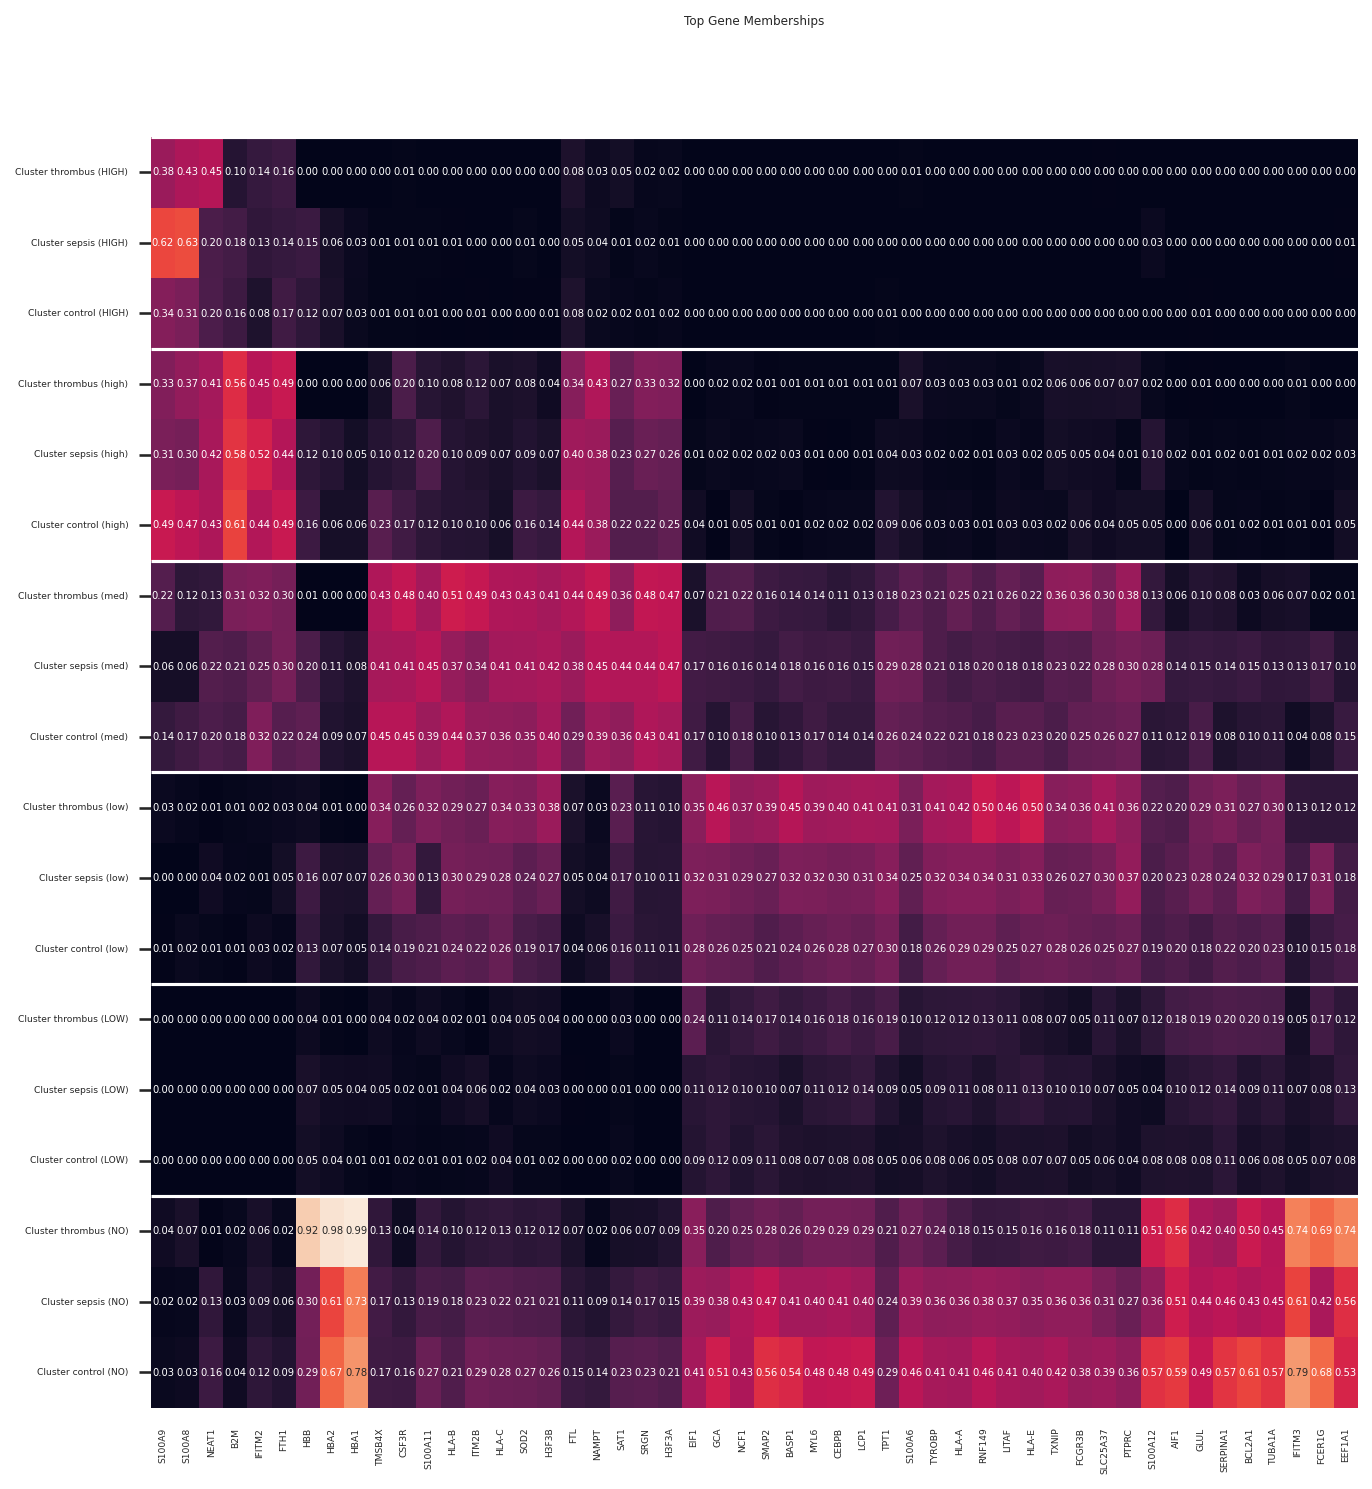

In [36]:
g=fa.plot_state_memberships(topgenes, cluster_genes=True, name="Top Gene Memberships")

Figure Size (6, 9)


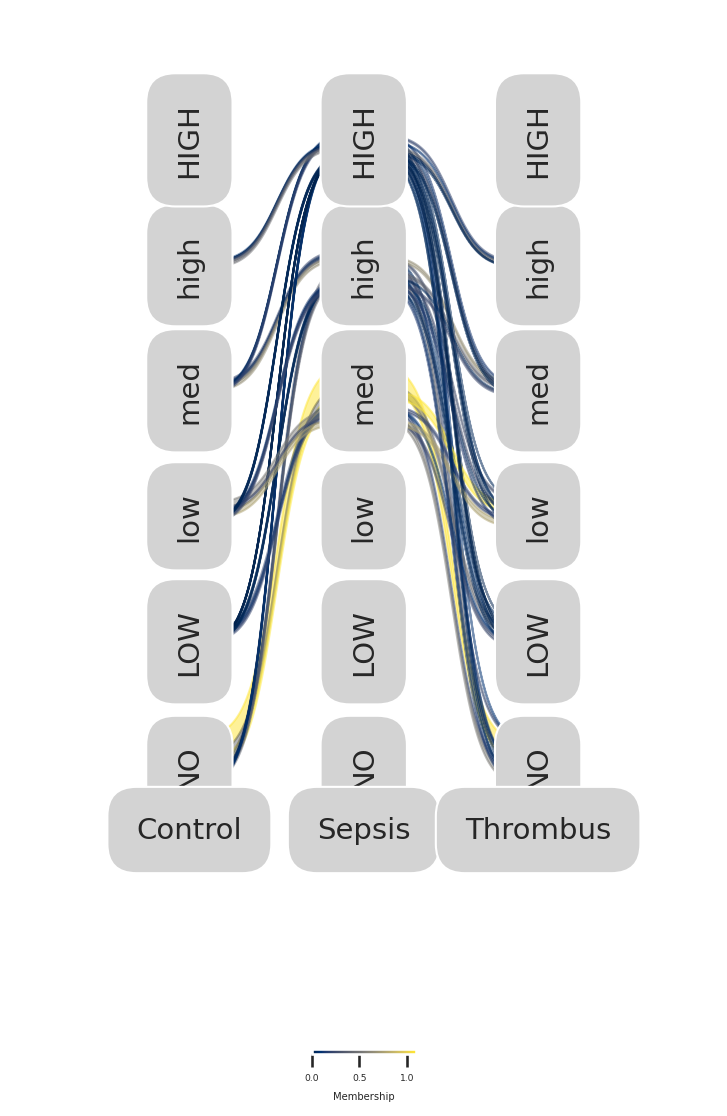

In [35]:
fa.visualize_genes(genes=topgenes, use_flows=relFlows, figsize=(6,9), score_modifier=lambda x: np.log2(1+x))